<center>
    <img src="ss.png" alt="Pdf Submission Format"width="100%">
</center>

<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">Employee Churn Prediction</h1></center>
<hr>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">1. | Introduction 👋</h1>


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> 🎳 Problem Statement</h1>
<div class="explain-box">
    As the global economy evolves, employee churn has become a critical challenge for organizations across various industries. The ability to predict employee churn accurately can provide valuable insights for HR departments and management teams to implement proactive measures aimed at retention and talent management. In this project, we aim to leverage various machine learning and deep learning techniques to develop a predictive model for employee churn, ultimately assisting organizations in identifying at-risk employees and devising effective retention strategies.
</div>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">🤔 Dataset Problems</h1>
<div class="explain-box">
    This dataset is taken from the <a style="color: #3D5A80" href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"><b>Kaggle Website</b></a>. This dataset contains <b>Employee data (i.e., name, age, department, income, etc.)</b> along with information on employechurnn. <b>With the help of machine learning models</b> based on the employee information provided in the dataset, we aim to <b>uncover the factors that lead to employechurnon</b> more deeply in this notebook.
</dv>


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">📌 Notebook Objectives</h1>
<div class="explain-box">
    This notebook <b>aims</b> to:
    <ul>
        <li><b>Perform dataset exploration</b> using various types of data visualization.</li>
        <li><b>Build machine learning model</b> that can predict employee attrition.</li>
        <li><b>Export prediction result on test data</b> into files.</li>
    </ul>
</div>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">👨‍💻 Machine Learning Model</h1>
<div class="explain-box">
    The <b>models</b> used in this notebook:
    <ol start="1">
        <li><b>Logistic Regression</b>,</li>
        <li><b>K-Nearest Neighbour (KNN)</b>,</li>
        <li><b>Support Vector Machine (SVM)</b>,</li>
        <li><b>Gaussian Naive Bayes</b>,</li>
        <li><b>Decision Tree</b>,</li>
        <li><b>Random Forest</b>,</li>
        <li><b>Extra Tree Classifier</b>,</li>
        <li><b>Gradient Boosting</b>, and</li>
        <li><b>AdaBoost</b>.</li>
    </ol>
</div>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">2. | Installing and Importing Libraries 📚</h1>
<div class="explain-box">
    <b>Installing and Importing libraries</b> that will be used in this notebook.
</div>

In [1]:
# --- Importing Libraries ---
from IPython.display import display, HTML, Javascript
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib
import tensorflow as tf
from tensorflow import keras

from ydata_profiling import ProfileReport
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score, precision_score, recall_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette
warnings.filterwarnings("ignore")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">3. | Reading Dataset 👓</h1>
<div class="explain-box">
    After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>

In [2]:
# --- Importing Dataset ---
df = pd.read_csv("employee.csv")

# --- Reading Train Dataset ---
class Color:
    # Define color codes
    start = '\033[91m'
    end = '\033[0m'
    color = '\033[94m'

# Create an instance of the Color class
clr = Color()

# Reading Train Dataset
print(clr.start + '.: Imported Dataset :.' + clr.end)
print(clr.color + '*' * 23)
styled_df = df.head(10).reset_index(drop=True).style.background_gradient(cmap='Blues').set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])
styled_df

.: Imported Dataset :.
***********************


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Dataset Description🧾</h1>
<div class="explain-box"> The following is the <b>structure of the dataset</b>. <br>
  <table style="font-family: Times New Roman; font-weight: 300; font-size: 12px; text-align: left; padding: 8px; border-collapse: collapse; width: 100%;">
    <thead>
      <tr>
        <th style="font-family: Open Sans; font-weight: 900; text-align: center; font-size: 14px; background-color: #0096C7">Variable Name</th>
        <th style="font-family: Open Sans; font-weight: 900; text-align: center; font-size: 14px; background-color: #0096C7">Description</th>
        <th style="font-family: Open Sans; font-weight: 900; text-align: center; font-size: 14px; background-color: #0096C7">Sample Data</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>
          <b>Age</b>
        </td>
        <td>Employee age (in years)</td>
        <td>[41, 49, 37]</td>
      </tr>
      <tr>
        <td>
          <b>Attrition</b>
        </td>
        <td>Employee attrition status</td>
        <td>['Yes','No']</td>
      </tr>
      <tr>
        <td>
          <b>BusinessTravel</b>
        </td>
        <td>Frequency of business travel</td>
        <td>['Travel_Rarely', 'Travel_Frequently', 'No Travel']</td>
      </tr>
      <tr>
        <td>
          <b>DailyRate</b>
        </td>
        <td>Daily rate of pay</td>
        <td>[102, 279, 1373]</td>
      </tr>
      <tr>
        <td>
          <b>Department</b>
        </td>
        <td>Department where employee works</td>
        <td>['Sales', 'Research & Development', 'Human Resources']</td>
      </tr>
      <tr>
        <td>
          <b>DistanceFromHome</b>
        </td>
        <td>Distance of employee's home from workplace (in miles)</td>
        <td>[1, 8, 2]</td>
      </tr>
      <tr>
        <td>
          <b>Education</b>
        </td>
        <td>Level of education attained</td>
        <td>[2, 1, 4]</td>
      </tr>
      <tr>
        <td>
          <b>EducationField</b>
        </td>
        <td>Field of education</td>
        <td>['Life Sciences', 'Other', 'Medical']</td>
      </tr>
      <tr>
        <td>
          <b>HourlyRate</b>
        </td>
        <td>Hourly rate of pay</td>
        <td>[94, 61, 92]</td>
      </tr>
      <tr>
        <td>
          <b>JobInvolvement</b>
        </td>
        <td>Level of involvement in job</td>
        <td>[3, 2, 4, 1]</td>
      </tr>
      <tr>
        <td>
          <b>JobLevel</b>
        </td>
        <td>Level of job position</td>
        <td>[2,1, 3 ]</td>
      </tr>
      <tr>
        <td>
          <b>JobRole</b>
        </td>
        <td>Role of employee in the job</td>
        <td>['Sales Executive', 'Research Scientist', 'Labora tory T echni cian']</td>
      </tr>
      <tr>
        <td>
          <b>JobSatisfaction</b>
        </td>      
        <td> Marital status of employee</td>
        <td>['Single', ' Married', 'Divorced']</td>
      </tr>
      <tr>
        <td>
          <b>MonthlyRate </ b>
        </td>
        <td>Monthly rate of pay</td>
        <td>[19479, 24907, 2396]</td>
      </tr>
      <tr>
        <td>
          <b>NumCompaniesWorked</b>
        </td>
        <td>Number of companies worked at previously</td>
        <td>[8, 1, 6]</td>
      </tr>
      <tr>
        <td>
          <b>OverTime</b>
        </td>
        <td>Whether the employee works overtime</td>
        <td>['Yes', 'No'] </ td>
      </tr>
      <tr>
        <td>
          <b>PercentSalaryHike</b>
        </td>
        <td>Percentage increase in salary</td>
        <td>[11, 23, 15]</td>
      </tr>
      <tr>
        <td>
          <b>PerformanceRating</b>
        </td>
        <td> Performance rating of employee</td>
        <td>[3, 4 ]</td>
      </tr>
      <tr>
        <td>
          <b>RelationshipSatisfaction</b>
          </ td>
        <td>Level of satisfaction with relationships at work</td>
        <td>[1, 4, 2, 3]</td>
      </tr>
      <tr>
        <td>
          <b>StandardHours </ b>
        </td>
        <td>Standard hours of work per week </td>
        <td>[80]</td>
      </tr>
      <tr>
        <td>
          <b>StockOptionLevel</b>
        </td>
        <td>Level of stock option available to employee< /td>
        <td>[0, 3, 2]</td>
      </tr>
      <tr>
        <td>
          <b>TotalWorkingears</b>
        </td>
        <td>Total number of years work ed</td>
        <td>[8, 10]</td>
      </tr>
      <tr>
        <td>
          <b>TrainingTimesLastYear</b>
            </td>
        <td>Number of training time s last year</td>
        <td>[0, 3,2]</td>
      </tr>
      <tr>
        <td>
          <b> WorkLifeBalance</b>
        </td>
        <td>Level of work-life balance</td>
        <td>[1, 3, 2, 4]</td>
        </ tr>
    </tbody>
  </table>
  <hr>
  <hr>
</div>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">4. | Data Preprocessing 🔍</h1>
<div class="explain-box">
    This section will focused on <b>initial data exploration on the dataset</b> with <u>Pandas Profiling</u> before pre-processing performed. In addition, <b>variables correlation</b> will be examined as well.
</div>

In [3]:
# --- Dataset Report ---
ProfileReport(df, 
               title="Employee Attrition Prediction",
               minimal=True,
               progress_bar=False,
               samples=None,
               interactions=None,
               explorative=True,
               dark_mode=True,
               notebook={'iframe': {'height': '600px'},
                         'html': {'style': {'primary_color': clr}},
                         'missing_diagrams': {'heatmap': False, 'dendrogram': False}}
              ).to_notebook_iframe()

<div class="explain-box">
  <h3>Some columns can be removed because their values do not affect the analysis results  </h3>
  <ul>
    <li>Over18: All values are 'Y'</li>
    <li>EmployeeCount: All values are 1</li>
    <li>StandardHours: All values are 80</li>
    <li>EmployeeNumber: Identifier for employees</li>
    <li>PercentSalaryHike: less correlated</li>
    <li>YearsSinceLastPromotion: less correlated</li>
    <li>DailyRate: Can be calculated from monthly income</li>
    <li>HourlyRate: Can be calculated from monthly income</li>
    <li>MonthlyRate: Can be calculated from monthly income</li>
    <li>PerformanceRating: Can be calculated from monthly income</li>
    <li>NumCompaniesWorked: Can be calculated from monthly income</li>
    <li>EducationNuCan be calculated from monthly incomeloyees</li>
  </ul>
</div>


In [4]:
df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber','PercentSalaryHike','YearsSinceLastPromotion'],axis=1)

In [5]:
df = df.drop(['DailyRate' ,'HourlyRate','MonthlyRate','PerformanceRating'],axis=1)

In [6]:
df = df.drop(['NumCompaniesWorked','Education'],axis=1)

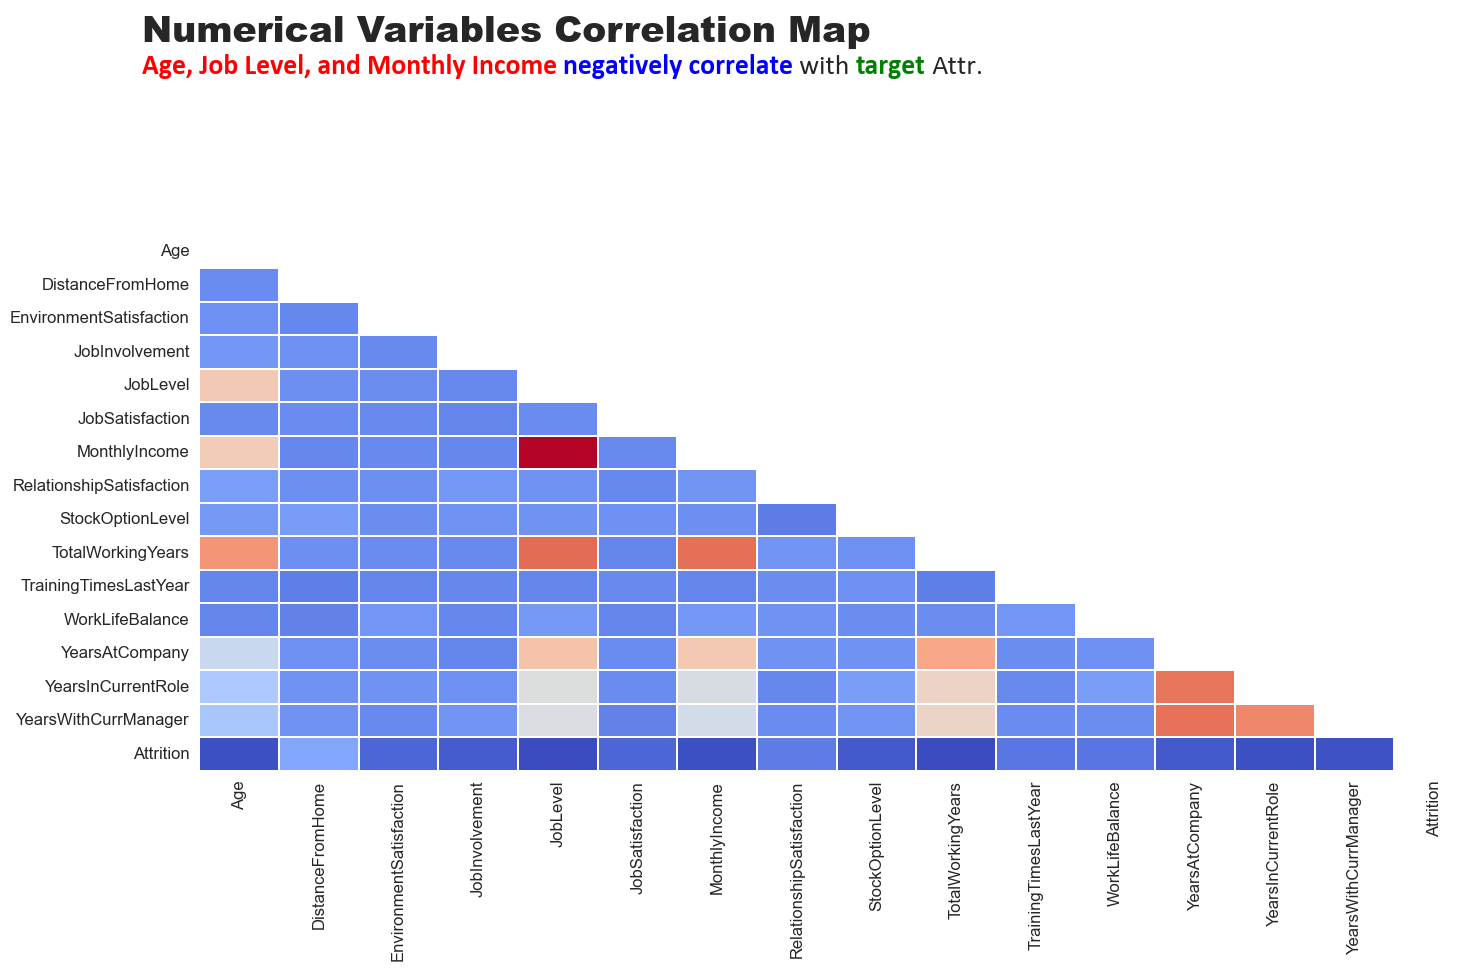

In [7]:
# --- Correlation Map Variables ---
palette = ["#4361EE", "#7209B7", "#3A0CA3", "#4CC9F0","#F72585"]
corr = df.corr(numeric_only=True)
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
suptitle = dict(x=0.1, y=1.01, fontsize=26, weight='heavy', ha='left', va='bottom', fontname='arial')
title = dict(x=0.1, y=0.98, fontsize=20, weight='normal', ha='left', va='bottom', fontname='calibri')
xy_label = dict(size=12)
highlight_textprops = [{'weight':'bold', 'color': colors[0]},{'weight':'bold', 'color': colors[1]},{'weight':'bold', 'color': colors[2]}]

# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.2, cbar=False, annot_kws={"size": 10}, rasterized=True)
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, rotation=90, **xy_label)
ax.set_yticklabels(ylabels, **xy_label)
ax.grid(False)
fig_text(s='Numerical Variables Correlation Map', **suptitle)
fig_text(s='<Age, Job Level, and Monthly Income> <negatively correlate> with <target> Attr.', highlight_textprops=highlight_textprops, **title)
plt.tight_layout(rect=[0, 0.08, 1, 1.01])


<div class="explain-box">
    From <b>dataset report</b> and <b>correlation matrix</b>, it can be <b>concluded</b> that:
    <blockquote style="color: #000000;">
        <ul>
            <li>There are <b>no missing values</b> detected in the dataset. In addition, it also can be seen that <b>the number of categorical columns is more than the numerical columns</b>.</li>
            <li>Furthermore, Average Monthly Income is <b>6502</mark>. </li>
            <li><b>The mean age of the employee in the dataset was 36 years old</b>, with the maximum being 60 years old and the youngest being 18 years old.</li>
        </ul>
    </blockquote>
</div>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">5. | EDA 📈</h1>
<div class="explain-box">
    This section will perform some <b>EDA</b> to get more insights about dataset.<br>
</div>

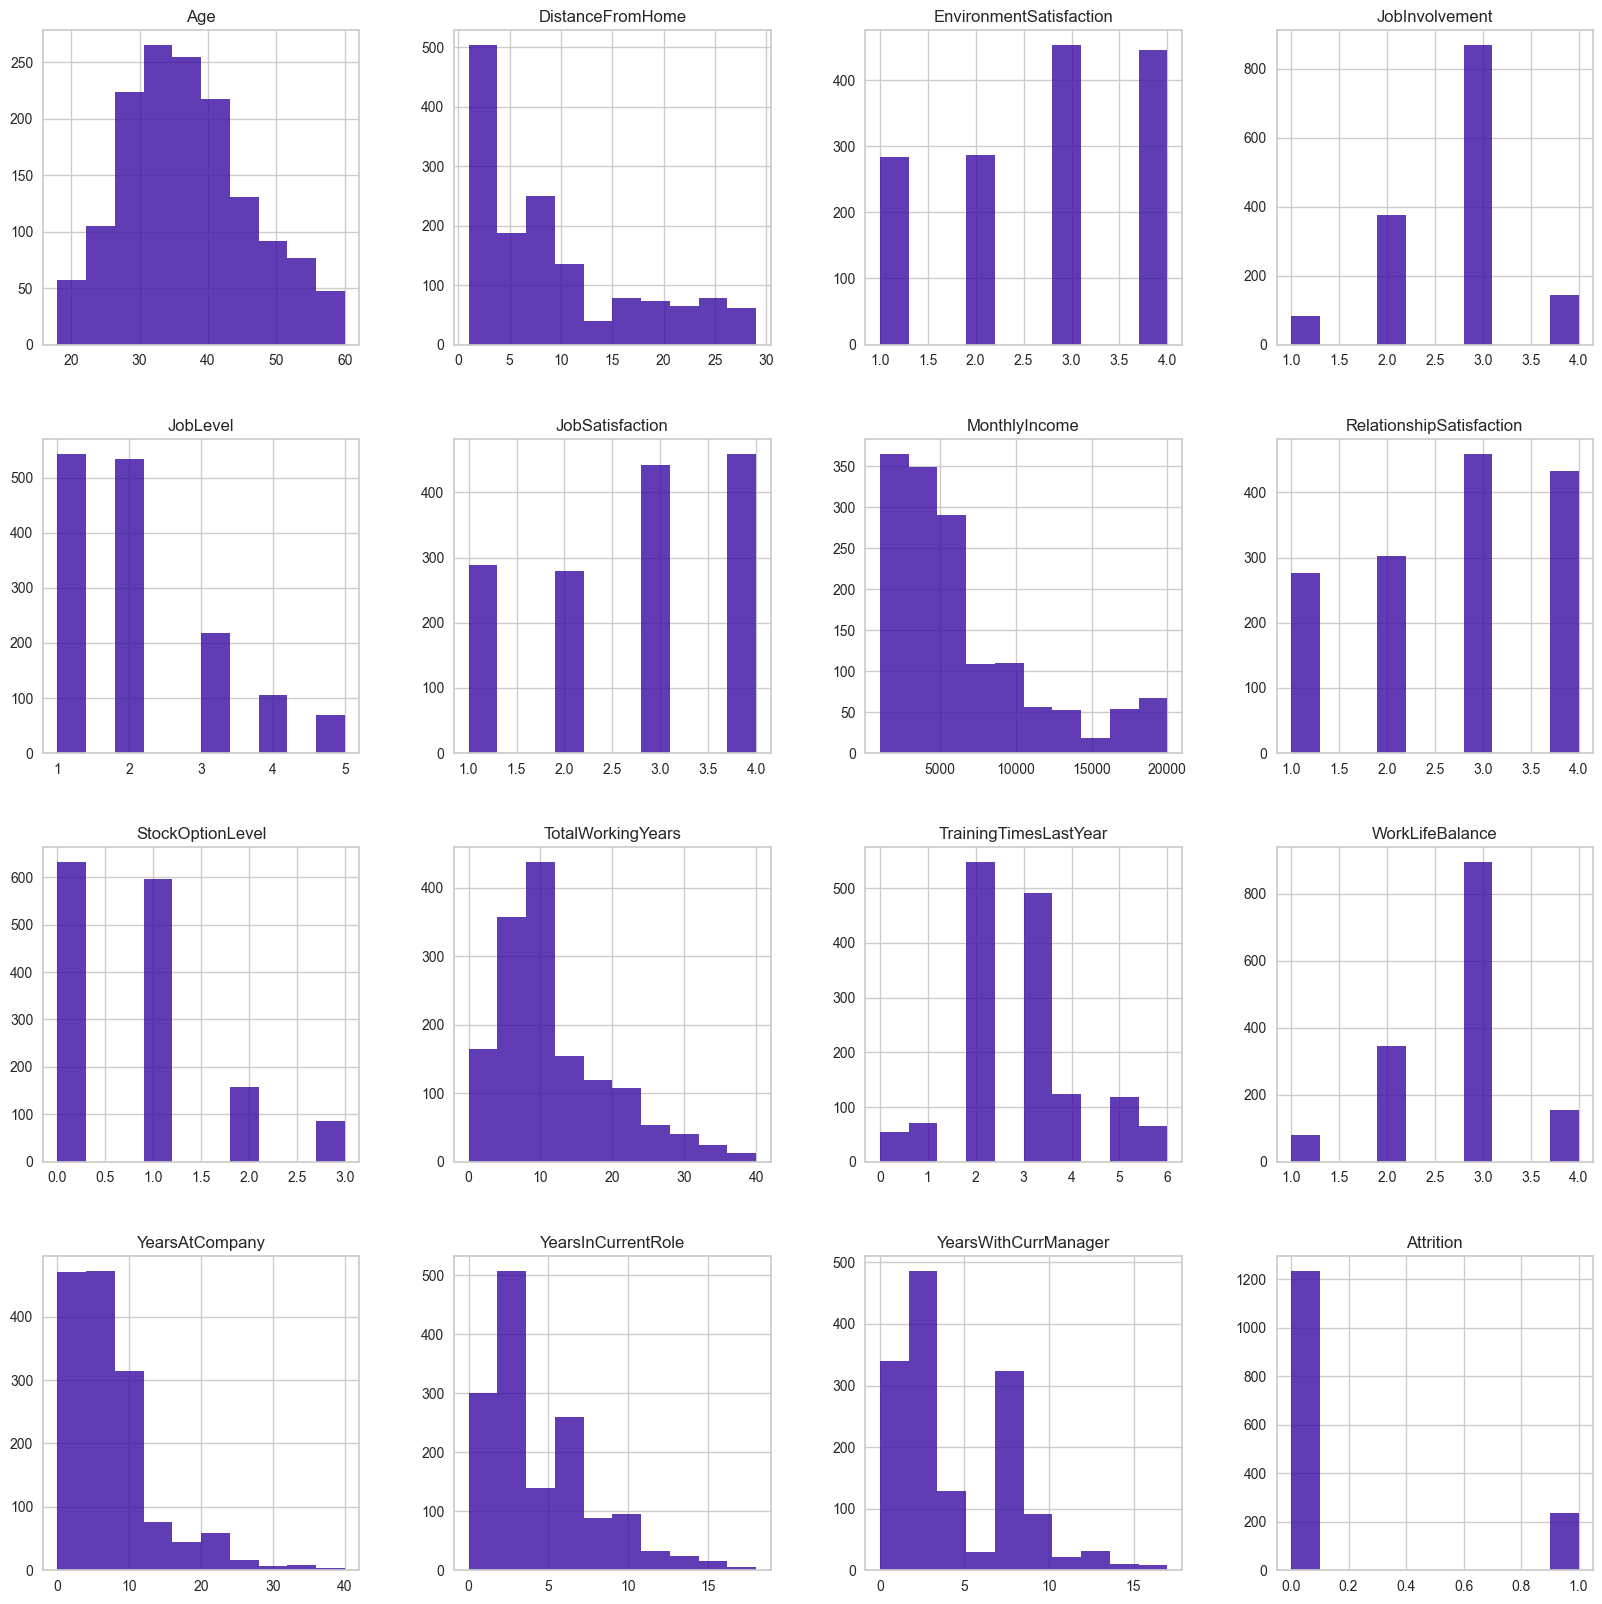

In [8]:
df.hist(figsize=(20, 20), color="#3A0CA3", alpha=0.8)
plt.show()

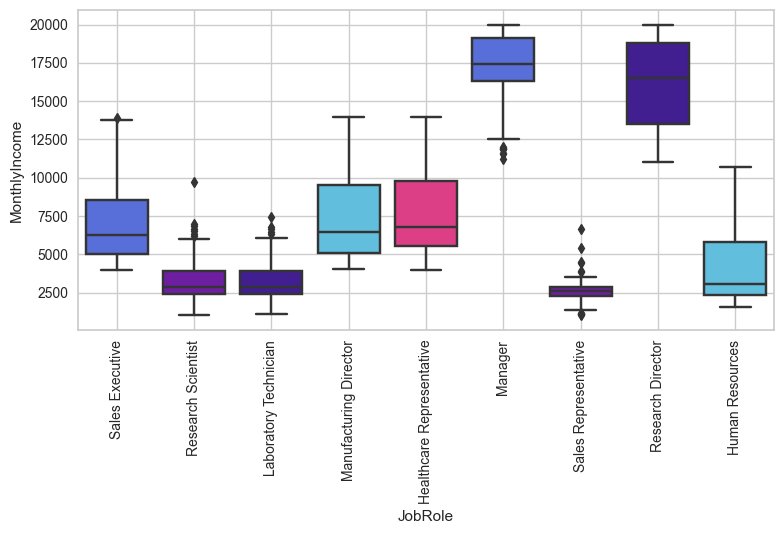

In [9]:
ax=sns.boxplot(y=df['MonthlyIncome'],x=df['JobRole'],palette=palette)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

<div class="explain-box">
    <h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Separating Categorical and Numerical Columns</h3>
</div>


In [10]:
#Categorical Columns
cat_columns = df.select_dtypes(['object']).columns
print(f"Categorical Columns: {cat_columns}")
#Numerical Columns
num_columns = df.select_dtypes(['number']).columns
num_columns = num_columns.drop('Attrition', errors='ignore')
print(f"Numerical Columns: {num_columns}")

Categorical Columns: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Numerical Columns: Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


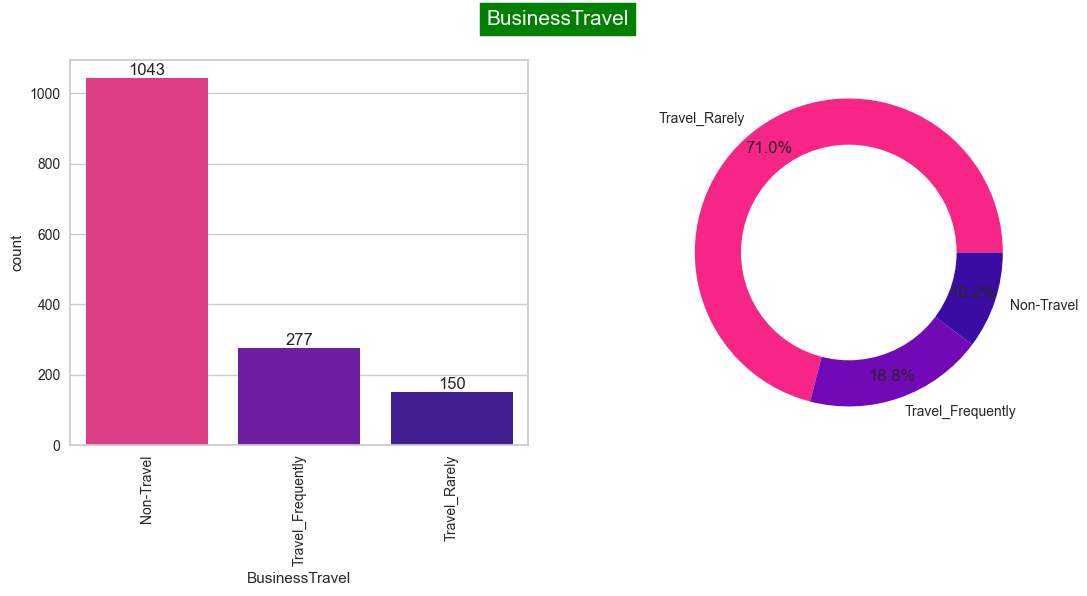

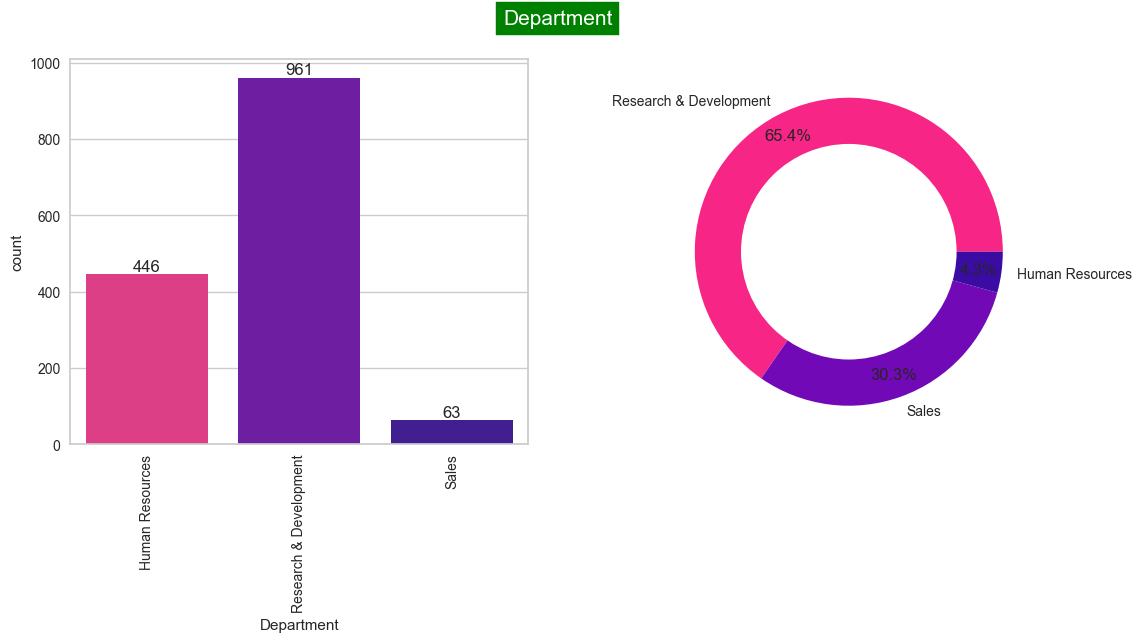

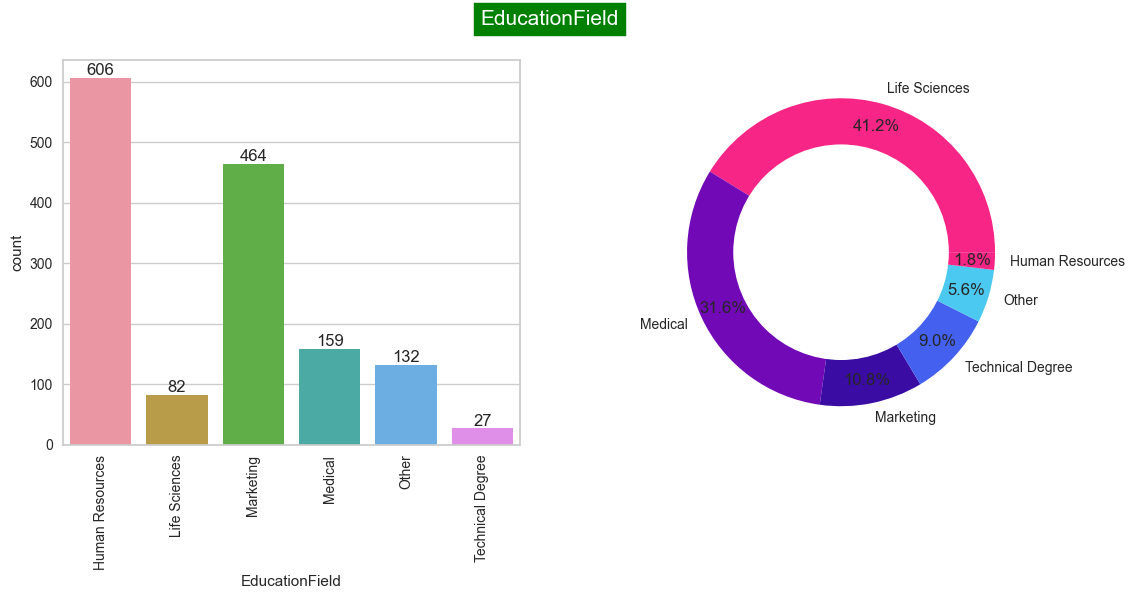

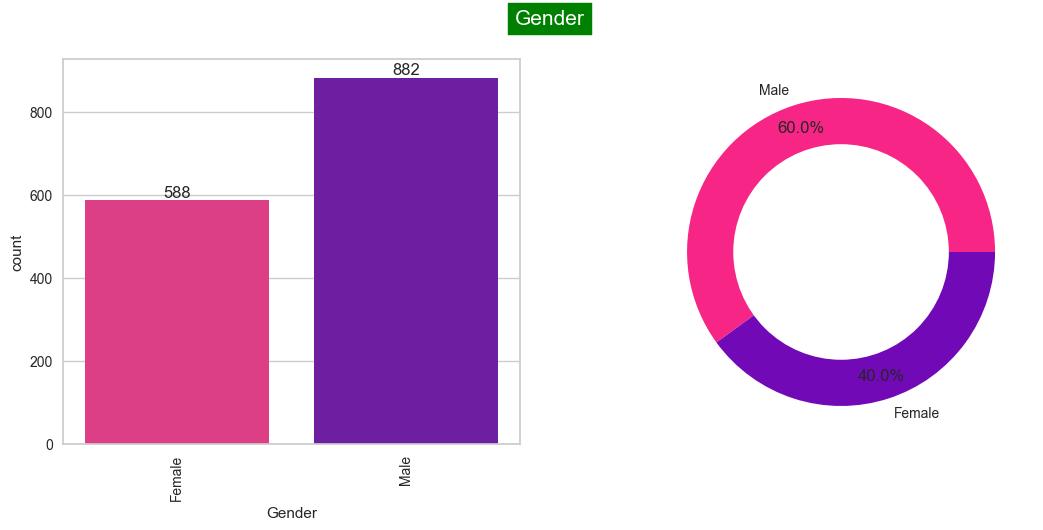

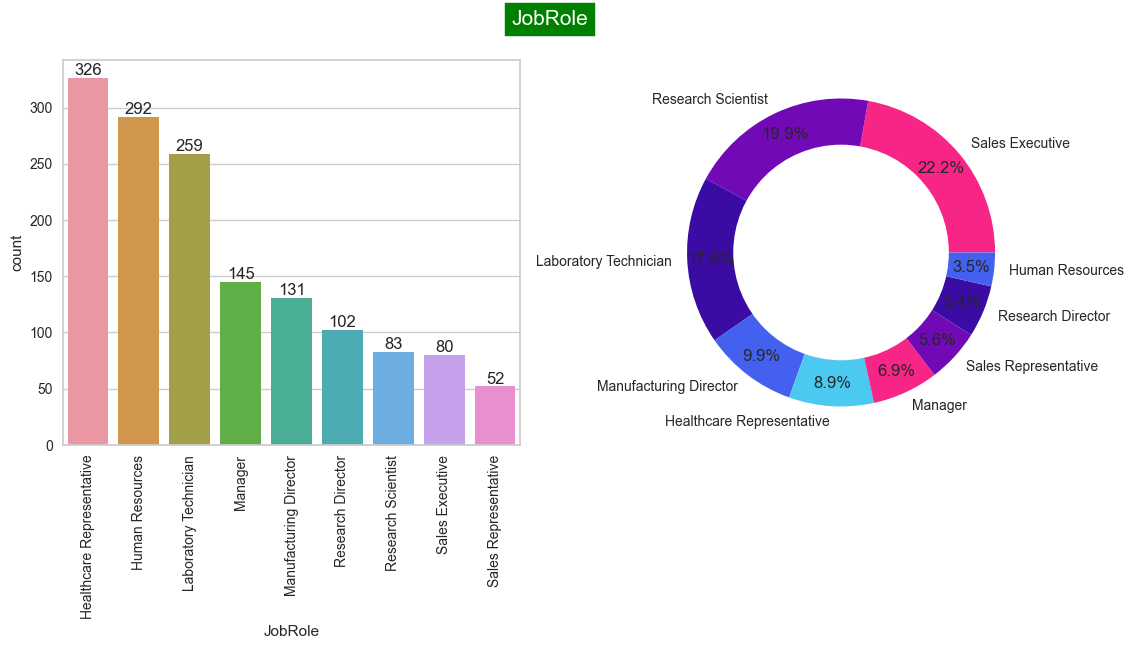

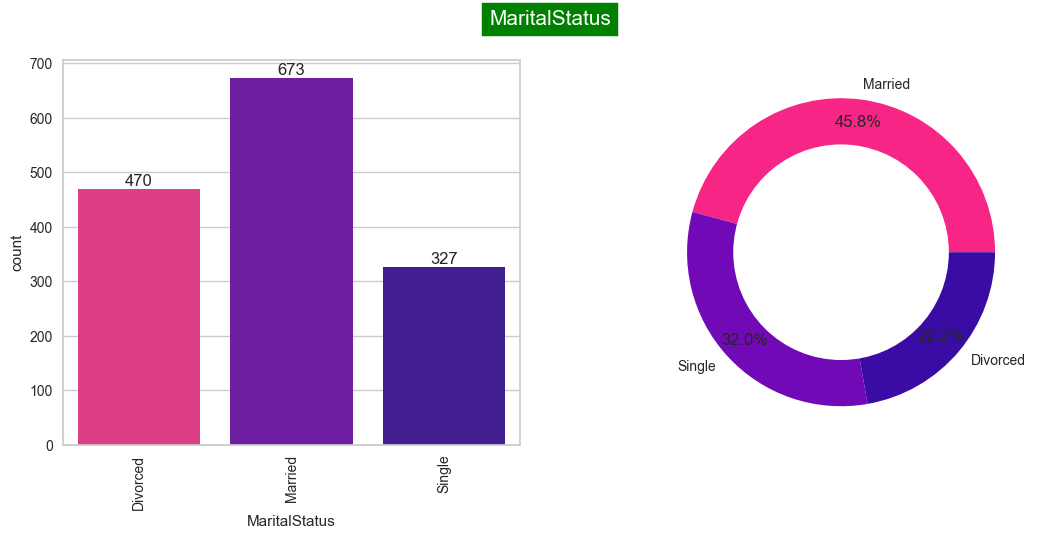

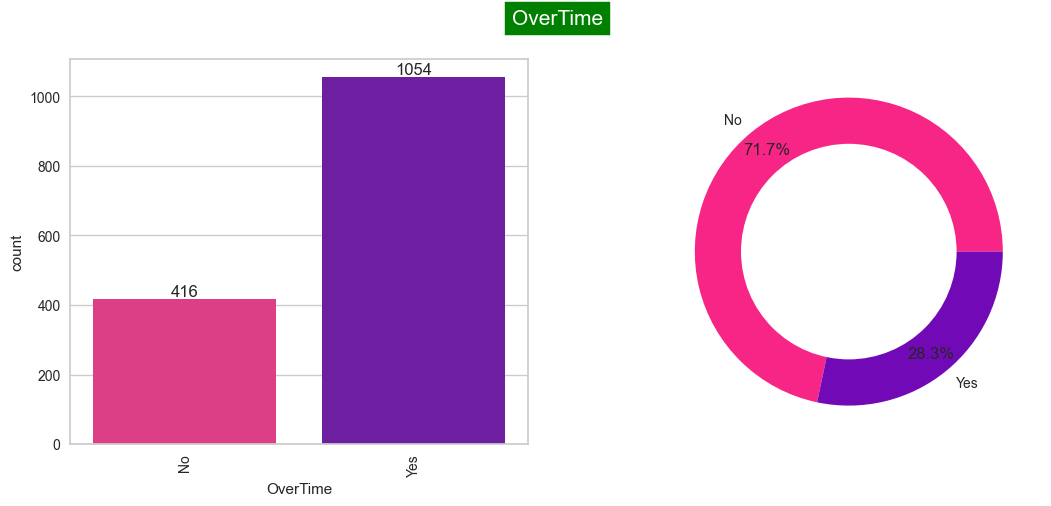

In [11]:
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
sns.set_palette(palette)
for i, col in enumerate(cat_columns):
    
    fig, axes = plt.subplots(1,2,figsize=(13,5))
    ax = sns.countplot(data=df,x=col , ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
            
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05,0.05)
    
    axes[1].pie(size , labels=index,autopct='%1.1f%%',pctdistance=0.85)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='green',color='white',fontsize=15)
    
    plt.show()

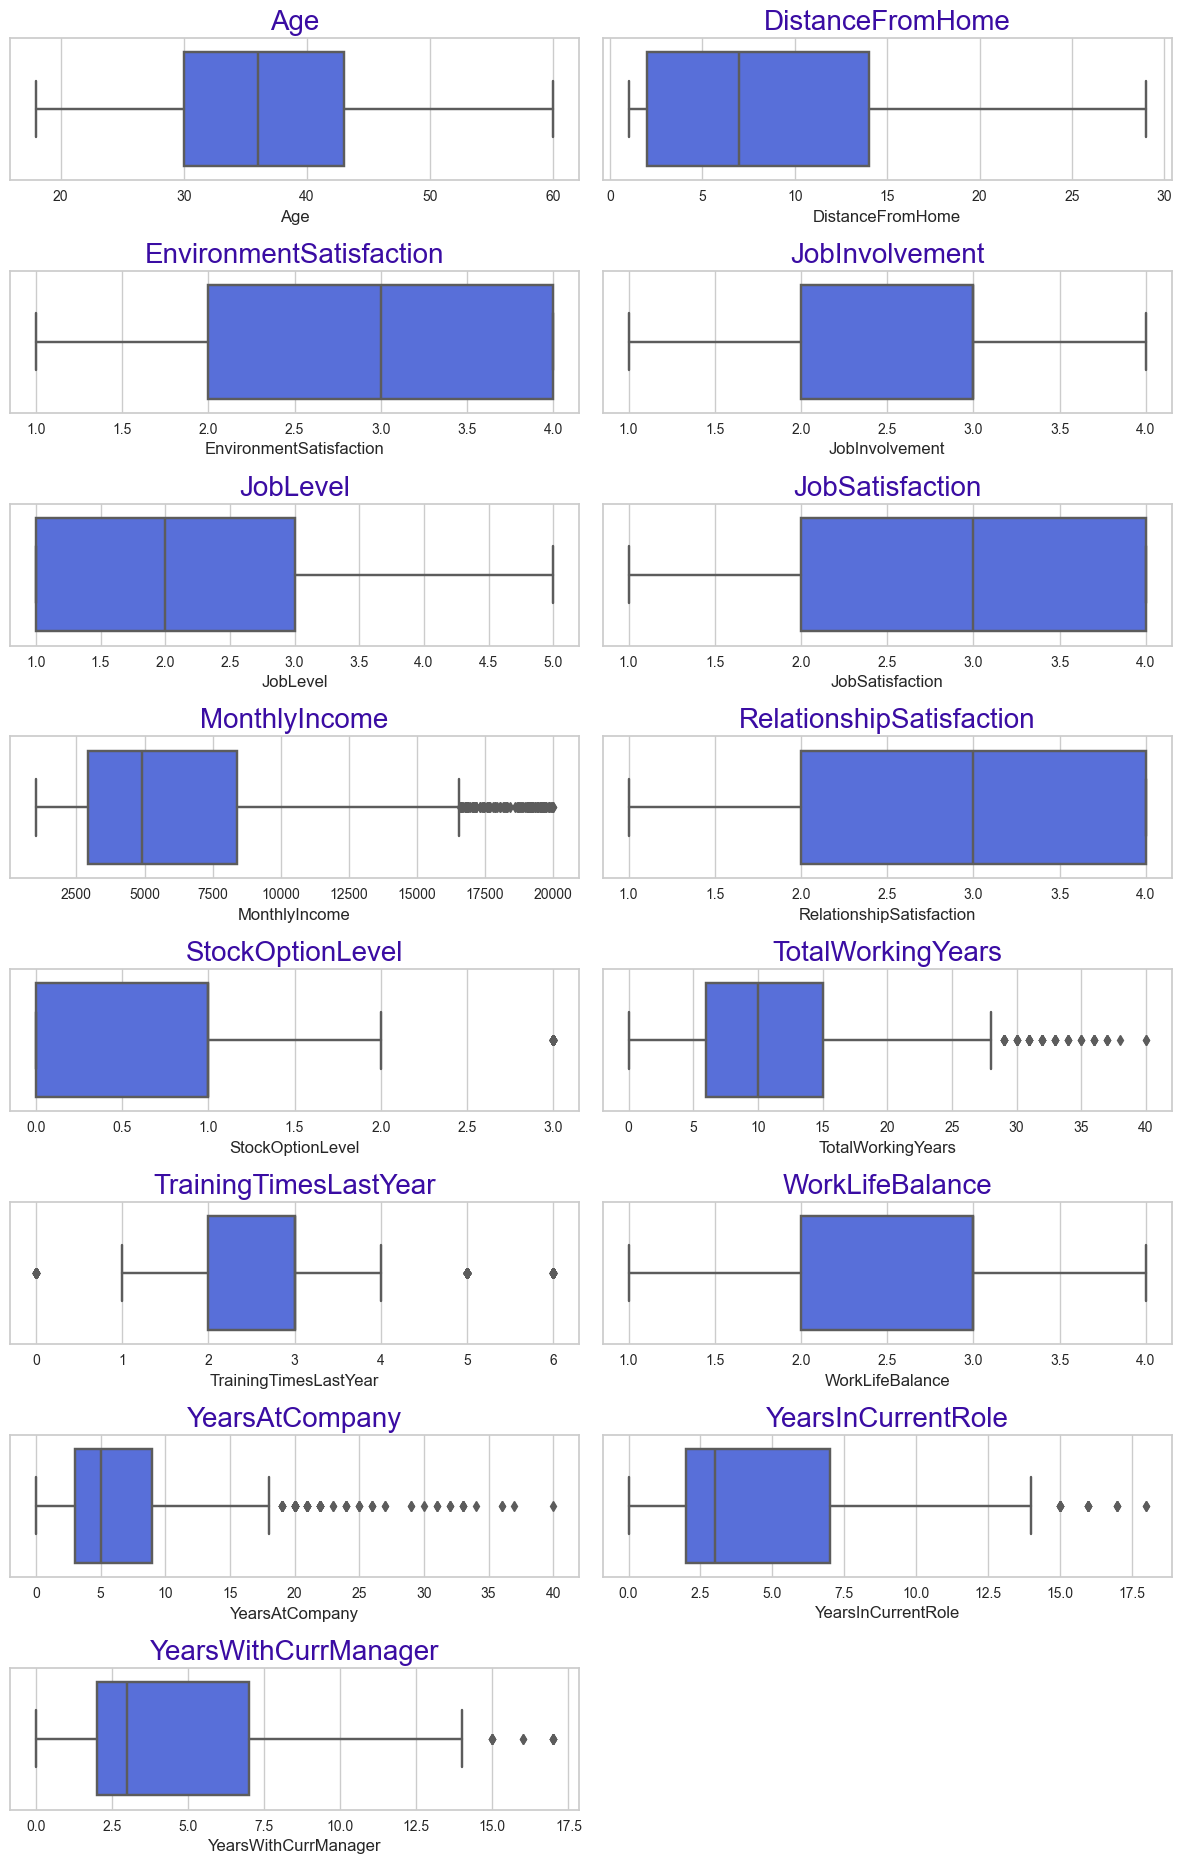

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 30))
for idx, i in enumerate(num_columns):
    plt.subplot(13, 2, idx + 1)
    sns.boxplot(x=i, data=df,color="#4361EE")
    plt.title(i, color='#3A0CA3', fontsize=20)
    plt.xlabel(i, size=12)
plt.tight_layout()
plt.show()


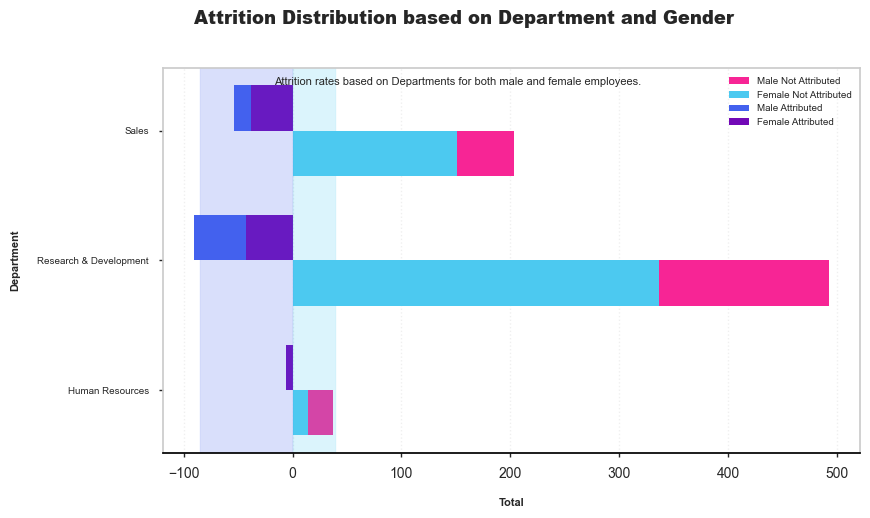

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# EDA 1 Dataframes
df_eda1 = df[['Gender', 'Department', 'Attrition']]
df_eda1 = pd.DataFrame(df_eda1.groupby(['Gender', 'Attrition', 'Department']).size().reset_index(name='total'))
df_eda1['total'] *= np.where(df_eda1['Attrition'] == 0, 1, -1)
df_eda1_m = df_eda1.query('Gender == "Male" & Attrition == 0')
df_eda1_f = df_eda1.query('Gender == "Female" & Attrition == 0')
df_eda1_ms = df_eda1.query('Gender == "Male" & Attrition == 1')
df_eda1_fs = df_eda1.query('Gender == "Female" & Attrition == 1')

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
bar_mns = plt.barh(np.arange(len(df_eda1_m)), df_eda1_m['total'], color='#F72595', height=0.35, label='Male Not Attributed')
bar_fns = plt.barh(np.arange(len(df_eda1_f)), df_eda1_f['total'], color='#4CC9F0', height=0.35, label='Female Not Attributed')
bar_ms = plt.barh(np.arange(len(df_eda1_ms)) + 0.35, df_eda1_ms['total'], color='#4361EE', height=0.35, label='Male Attributed')
bar_fs = plt.barh(np.arange(len(df_eda1_fs)) + 0.35, df_eda1_fs['total'], color='#7209B7', height=0.35, label='Female Attributed')

ax.set_yticks(np.arange(len(df_eda1.Department.unique())) + 0.35 / 2)
ax.set_yticklabels(df_eda1.Department.unique(), fontsize=7)
plt.xlabel('\nTotal', fontweight='bold', fontsize=8)
plt.ylabel('Department\n', fontweight='bold', fontsize=8)
plt.grid(axis='y', alpha=0, zorder=2)
plt.grid(axis='x', which='major', alpha=0.3, linestyle='dotted', zorder=1)

plt.axvspan(-85, 0, color='#4361EE', alpha=0.2)
plt.axvspan(40, 0, color='#4CC9F0', alpha=0.2)

plt.legend(fontsize=7)
plt.tick_params(bottom='on', length=3, width=1)
ax.spines['bottom'].set_color('black')

plt.suptitle('Attrition Distribution based on Department and Gender', x=0.16, y=0.96, fontsize=13, weight='heavy', ha='left', va='bottom')
plt.title("Attrition rates based on Departments for both male and female employees.", x=0.16, y=0.93, fontsize=8, weight='normal', ha='left', va='bottom')

plt.show()


## 💡 Analysis of graphs
<div class="explain-box">
    <p>From <b>dataset report</b> and <b>correlation matrix</b>, it can be <b>concluded</b> that:</p>
    <blockquote style="color: #000000;">
        <ul>
            <li>Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.</li>
            <li>As income increases, attrition decreases.</li>
            <li>Attrition is much, much less in divorced women.</li>
            <li>Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.</li>
            <li>Attrition is the highest for those in level 1 jobs.</li>
            <li>Women with the job position of manager, research director, and laboratory technician have almost no attrition.</li>
            <li>Men with the position of sales expert have more attrition as compare to female.</li>
            <li>Department of Research & Devlopment has highest attrition in terms both male and female as compared to other deparemnt</li>
        </ul>
    </blockquote>
</div>


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6. | Data Preprocessing ⚙️</h1>
<div class="explain-box">
    This section will <b>prepare the dataset</b> before building the machine learning models.
</div>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.1 | Features Separating and Splitting 🪓</h2>
<div class="explain-box">
     In this section, <b>the 'Attrition' (dependent) column will be seperated from independent columns</b>. Also, the dataset will be splitted into <b>90:10 ratio</b> (90% training and 10% testing).
</div>

In [14]:
# --- Seperating Dependent Features ---
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# --- Splitting Dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.2 | Processing Pipeline 🪠</h2>
<div class="explain-box">
    This section will <b>create a preprocessing pipeline</b> for numerical and categorical columns and <b>apply them to the <code>x_train</code> and <code>x_test</code> data</b>. Not all columns will go through preprocessing. For <b>all numerical columns</b>, scaling will be carried out using a <b>MinMax scaler</b> since the dataset used is a <b>small dataset</b> where the presence of outliers dramatically affects the performance of a model. While for <b>categorical columns with more than two categories, one-hot encoding will be carried out</b>.</div>

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# --- Numerical Pipeline ---
num_pipeline = Pipeline([
    ('scaling', MinMaxScaler())
])

# --- Categorical Pipeline ---
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# --- Combine Both Pipelines into Transformer ---
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_columns),
    ('numerical', num_pipeline, num_columns)
], remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])
# --- Apply to DataFrame --- 
X_train_process = process_pipeline.fit_transform(X_train)
X_test_process = process_pipeline.fit_transform(X_test)

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.3 | Treating Dataset Imbalance ⚖️</h2>

<div class="explain-box">
    <strong>Dataset Imbalance:</strong> Only <b>16%</b> represent churn employees, impacting model accuracy.
</div>

<div class="explain-box">
    <strong>Solution: Synthetic Minority Over-sampling Technique (SMOTE)</strong>
    <p>SMOTE mitigates class imbalance by oversampling the minority class.</p>
    <p>It generates synthetic samples, increasing minority class representation.</p>
</div>

<div class="explain-box">
    <strong>Benefits:</strong>
    <p>1. <em>Improved Learning:</em> Better understanding of minority class characteristics.</p>
    <p>2. <em>Enhanced Predictions:</em> Reduces bias, improving predictive performance.</p>
</div>

<div class="explain-box">
    <strong>Outcome:</strong>
    <p>1. <em>Balanced Dataset:</em> Improves model generalization and accuracy.</p>
    <p>2. <em>Business Impact:</em> Informed decisions on potential churn employees.</p>
</div>


<center>
    <img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*YH_vPYQEDIW0JoUYMeLz_A.png' alt='Sampling'>
</center>

In [16]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
X_sm_train , y_sm_train = oversampler.fit_resample(X_train_process,y_train)
X_sm_test , y_sm_test = oversampler.fit_resample(X_test_process,y_test)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7. | Machine Learning Model Implementation 🛠️</h1>
<div class="explain-box">
    This section will <b>implement various machine learning models</b> as mentioned in Introduction section. In addition, explanation for each models also will be discussed.
</div>

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score

color_yb = sns.color_palette("Paired")
color_line = 'red'
color = 'red'

def fit_ml_models(algo, algo_param, algo_name):
    # --- Algorithm Pipeline ---
    algo = Pipeline([('algo', algo)])
    
    # --- Apply Grid Search ---
    model = GridSearchCV(algo, param_grid=algo_param, cv=10, n_jobs=-1, verbose=1)
    
    # --- Fitting Model ---
    print(clr.start + f".:. Fitting {algo_name} .:." + clr.end)
    fit_model = model.fit(X_sm_train, y_sm_train)
    
    # --- Model Best Parameters ---
    best_params = model.best_params_
    print("\n>> Best Parameters: " + clr.start + f"{best_params}" + clr.end)
    
    # --- Create Prediction for Train & Test ---
    y_pred_train = model.predict(X_sm_train)
    y_pred_test = model.predict(X_sm_test)

    # --- Calculate F1 score ---
    f1_score_train = f1_score(y_sm_train, y_pred_train)
    f1_score_test = f1_score(y_sm_test, y_pred_test)

    # --- Calculate Precision ---
    precision_train = precision_score(y_sm_train, y_pred_train)
    precision_test = precision_score(y_sm_test, y_pred_test)

    # --- Calculate Recall ---
    recall_train = recall_score(y_sm_train, y_pred_train)
    recall_test = recall_score(y_sm_test, y_pred_test)

    # --- Best & Final Estimators ---
    best_model = model.best_estimator_
    best_estimator = model.best_estimator_._final_estimator
    best_score = round(model.best_score_, 4)
    
    # --- Print Best Score ---
    print(">> Best Score: " + clr.start + "{:.3f}".format(best_score) + clr.end)
    
    # --- Train & Test Accuracy Score ---
    acc_score_train = round(accuracy_score(y_pred_train, y_sm_train) * 100, 3)
    acc_score_test = round(accuracy_score(y_pred_test, y_sm_test) * 100, 3)
    print("\n" + clr.start + f".:. Train and Test Accuracy Score for {algo_name} .:." + clr.end)
    print("\t>> Train Accuracy: " + clr.start + "{:.2f}%".format(acc_score_train) + clr.end)
    print("\t>> Test Accuracy: " + clr.start + "{:.2f}%".format(acc_score_test) + clr.end)
    
    # --- Classification Report ---
    print("\n" + clr.start + f".:. Classification Report for {algo_name} .:." + clr.end)
    print(classification_report(y_sm_test, y_pred_test))
    
    # --- Figures Settings ---
    xy_label = dict(fontweight='bold', fontsize=12)
    grid_style = dict(color=color, linestyle='dotted', zorder=1)
    title_style = dict(fontsize=14, fontweight='bold')
    tick_params = dict(length=3, width=1, color='red')
    bar_style = dict(zorder=3, edgecolor='black', linewidth=0.5, alpha=0.85)
    set_palette(color_yb)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))
    
    # --- Confusion Matrix ---
    conf_matrix = ConfusionMatrix(best_estimator, ax=ax1, cmap='Reds')
    conf_matrix.fit(X_sm_train, y_sm_train)
    conf_matrix.score(X_sm_test, y_sm_test)
    conf_matrix.finalize()
    conf_matrix.ax.set_title('Confusion Matrix\n', **title_style)
    conf_matrix.ax.tick_params(axis='both', labelsize=10, bottom='on', left='on', **tick_params)
    for spine in conf_matrix.ax.spines.values(): spine.set_color(color_line)
    conf_matrix.ax.set_xlabel('\nPredicted Class', **xy_label)
    conf_matrix.ax.set_ylabel('True Class\n', **xy_label)
    conf_matrix.ax.xaxis.set_ticklabels(['False', 'True'], rotation=0)
    conf_matrix.ax.yaxis.set_ticklabels(['True', 'False'])
    
    # --- ROC AUC ---
    logrocauc = ROCAUC(best_estimator, classes=['False', 'True'], ax=ax2, colors=color_yb)
    logrocauc.fit(X_sm_train, y_sm_train)
    logrocauc.score(X_sm_test, y_sm_test)
    logrocauc.finalize()
    logrocauc.ax.set_title('ROC AUC Curve\n', **title_style)
    logrocauc.ax.tick_params(axis='both', labelsize=10, bottom='on', left='on', **tick_params)
    logrocauc.ax.grid(axis='both', alpha=0.4, **grid_style)
    for spine in logrocauc.ax.spines.values(): spine.set_color('None')
    for spine in ['bottom', 'left']:
        logrocauc.ax.spines[spine].set_visible(True)
        logrocauc.ax.spines[spine].set_color(color_line)
    logrocauc.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
    logrocauc.ax.set_xlabel('\nFalse Positive Rate', **xy_label)
    logrocauc.ax.set_ylabel('True Positive Rate\n', **xy_label)
    
    # --- Learning Curve ---
    lcurve = LearningCurve(best_estimator, scoring='f1_weighted', ax=ax3, colors=color_yb)
    lcurve.fit(X_sm_train, y_sm_train)
    lcurve.finalize()
    lcurve.ax.set_title('Learning Curve\n', **title_style)
    lcurve.ax.tick_params(axis='both', labelsize=10, bottom='on', left='on', **tick_params)
    lcurve.ax.grid(axis='both', alpha=0.4, **grid_style)
    for spine in lcurve.ax.spines.values(): spine.set_color('None')
    for spine in ['bottom', 'left']:
        lcurve.ax.spines[spine].set_visible(True)
        lcurve.ax.spines[spine].set_color(color_line)
    lcurve.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
    lcurve.ax.set_xlabel('\nTraining Instances', **xy_label)
    lcurve.ax.set_ylabel('Scores\n', **xy_label)

    try:
        feat_importance = FeatureImportances(best_estimator, labels=columns_list_onehot, ax=ax4, topn=5, colors=color_yb_importance)
        feat_importance.fit(X_sm_train, y_sm_train)
        feat_importance.finalize()
        feat_importance.ax.set_title('Feature Importances (Top 5 Features)\n', **title_style)
        feat_importance.ax.tick_params(axis='both', labelsize=10, bottom='on', left='on', **tick_params)
        feat_importance.ax.grid(axis='x', alpha=0.4, **grid_style)
        feat_importance.ax.grid(axis='y', alpha=0, **grid_style)
        for spine in feat_importance.ax.spines.values(): spine.set_color('None')
        for spine in ['bottom']:
            feat_importance.ax.spines[spine].set_visible(True)
            feat_importance.ax.spines[spine].set_color(color_line)
        feat_importance.ax.set_xlabel('\nRelative Importance', **xy_label)
        feat_importance.ax.set_ylabel('Features\n', **xy_label)
    except:
        prec_curve = PrecisionRecallCurve(best_estimator, ax=ax4, ap_score=True, iso_f1_curves=True)
        prec_curve.fit(X_sm_train, y_sm_train)
        prec_curve.score(X_sm_test, y_sm_test)
        prec_curve.finalize()
        prec_curve.ax.set_title('Precision-Recall Curve\n', **title_style)
        prec_curve.ax.tick_params(axis='both', labelsize=10, bottom='on', left='on', **tick_params)
        for spine in prec_curve.ax.spines.values(): spine.set_color('None')
        for spine in ['bottom', 'left']:
            prec_curve.ax.spines[spine].set_visible(True)
            prec_curve.ax.spines[spine].set_color(color_line)
        prec_curve.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=10)
        prec_curve.ax.set_xlabel('\nRecall', **xy_label)
        prec_curve.ax.set_ylabel('Precision\n', **xy_label)


        
    plt.suptitle(f'\n{algo_name} Performance Evaluation Report\n', fontsize=18, fontweight='bold')
    plt.gcf().text(0.88, 0.02, 'kaggle.com/darshanpathak12', style='italic', fontsize=10)
    plt.tight_layout()
    
    return acc_score_train, acc_score_test, best_score, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.1 | Logistic Regression</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Logistic regression</b> is a statistical method that is used for building machine learning models where <b>the dependent variable is dichotomous: i.e. binary</b>. Logistic regression is used to describe data and <b>the relationship between one dependent variable and one or more independent variables</b>. The independent variables can be nominal, ordinal, or of interval type.<br><br>
    The name "logistic regression" is derived from the concept of the logistic function that it uses. <b>The logistic function is also known as the sigmoid function</b>. The value of this logistic function lies between zero and one.<br><br>
        <center>
            <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%"><br>
        </center>
    </blockquote>
</div>

.:. Fitting Logistic Regression .:.
Fitting 10 folds for each of 12 candidates, totalling 120 fits

>> Best Parameters: {'algo__C': 0.8, 'algo__solver': 'saga'}
>> Best Score: 0.785

.:. Train and Test Accuracy Score for Logistic Regression .:.
	>> Train Accuracy: 79.31%
	>> Test Accuracy: 67.74%

.:. Classification Report for Logistic Regression .:.
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       124
           1       0.70      0.61      0.66       124

    accuracy                           0.68       248
   macro avg       0.68      0.68      0.68       248
weighted avg       0.68      0.68      0.68       248



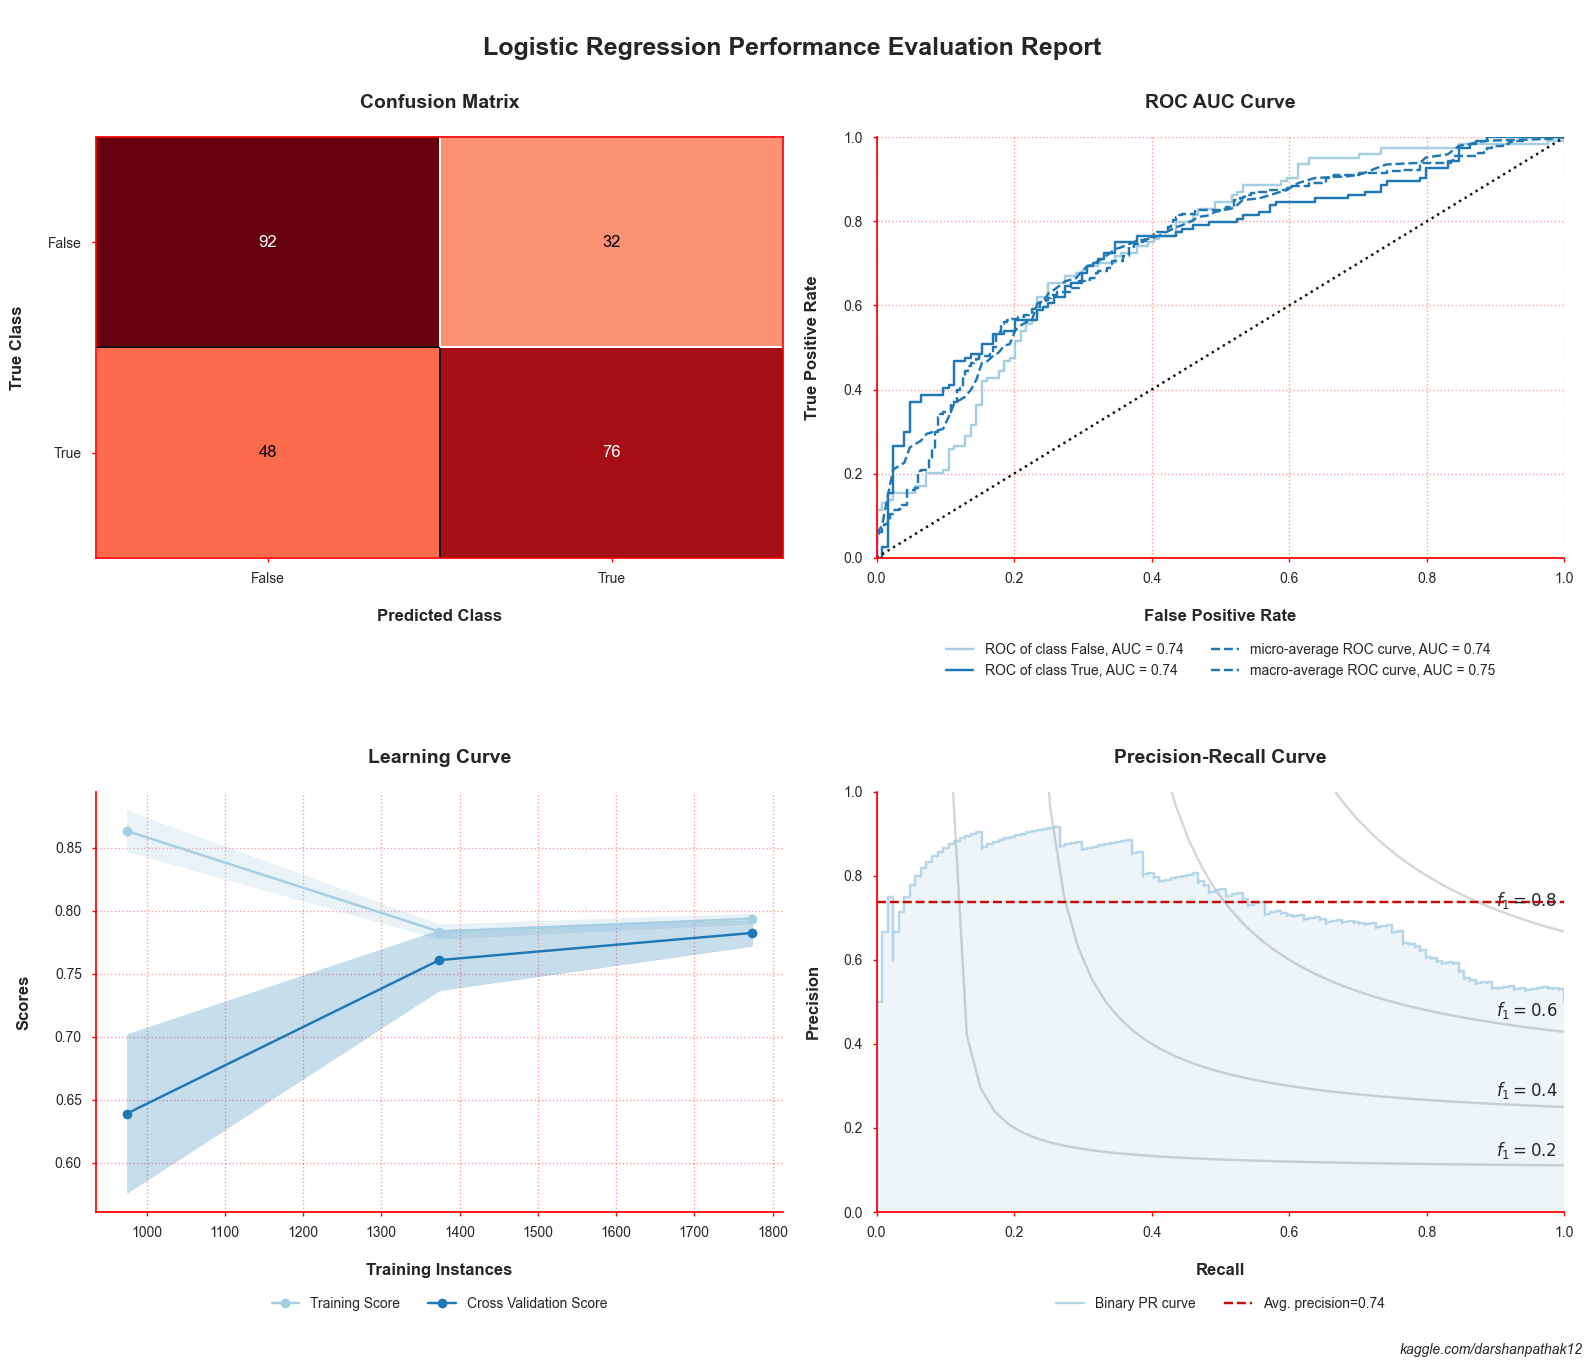

In [18]:
# --- Logistic Regression Parameters ---
parameter_lr = {"algo__solver": ["lbfgs", "saga", "newton-cg"]
                , "algo__C": [0.1, 0.2, 0.5, 0.8]}

# --- Logistic Regression Algorithm ---
algo_lr = LogisticRegression(penalty="l2", random_state=42, n_jobs=-1)

# --- Applying Logistic Regression ---
acc_score_train_lr, acc_score_test_lr, best_score_lr,f1_score_train_lr,f1_score_test_lr,precision_train_lr,precision_test_lr,recall_train_lr,recall_test_lr = fit_ml_models(algo_lr, parameter_lr, "Logistic Regression")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.2 | K-Nearest Neighbour (KNN)</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>The k-nearest neighbors (KNN)</b> algorithm is a data classification method <b>for estimating the likelihood that a data point will become a member of one group or another</b> based on what group the data points nearest to it belong to. The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used <b>to solve classification and regression problems</b>.<br><br>
    It's called a <b>lazy learning algorithm or lazy learner</b> because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.<br><br>
        <center>
        <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*2_qzcm2gSe9l67aI.png" alt="KNN" width="35%"><br>
        </center>
    </blockquote>
</div>

.:. Fitting K-Nearest Neighbour (KNN) .:.
Fitting 10 folds for each of 16 candidates, totalling 160 fits

>> Best Parameters: {'algo__leaf_size': 1, 'algo__n_neighbors': 2}
>> Best Score: 0.923

.:. Train and Test Accuracy Score for K-Nearest Neighbour (KNN) .:.
	>> Train Accuracy: 100.00%
	>> Test Accuracy: 55.65%

.:. Classification Report for K-Nearest Neighbour (KNN) .:.
              precision    recall  f1-score   support

           0       0.53      0.88      0.66       124
           1       0.66      0.23      0.35       124

    accuracy                           0.56       248
   macro avg       0.60      0.56      0.50       248
weighted avg       0.60      0.56      0.50       248



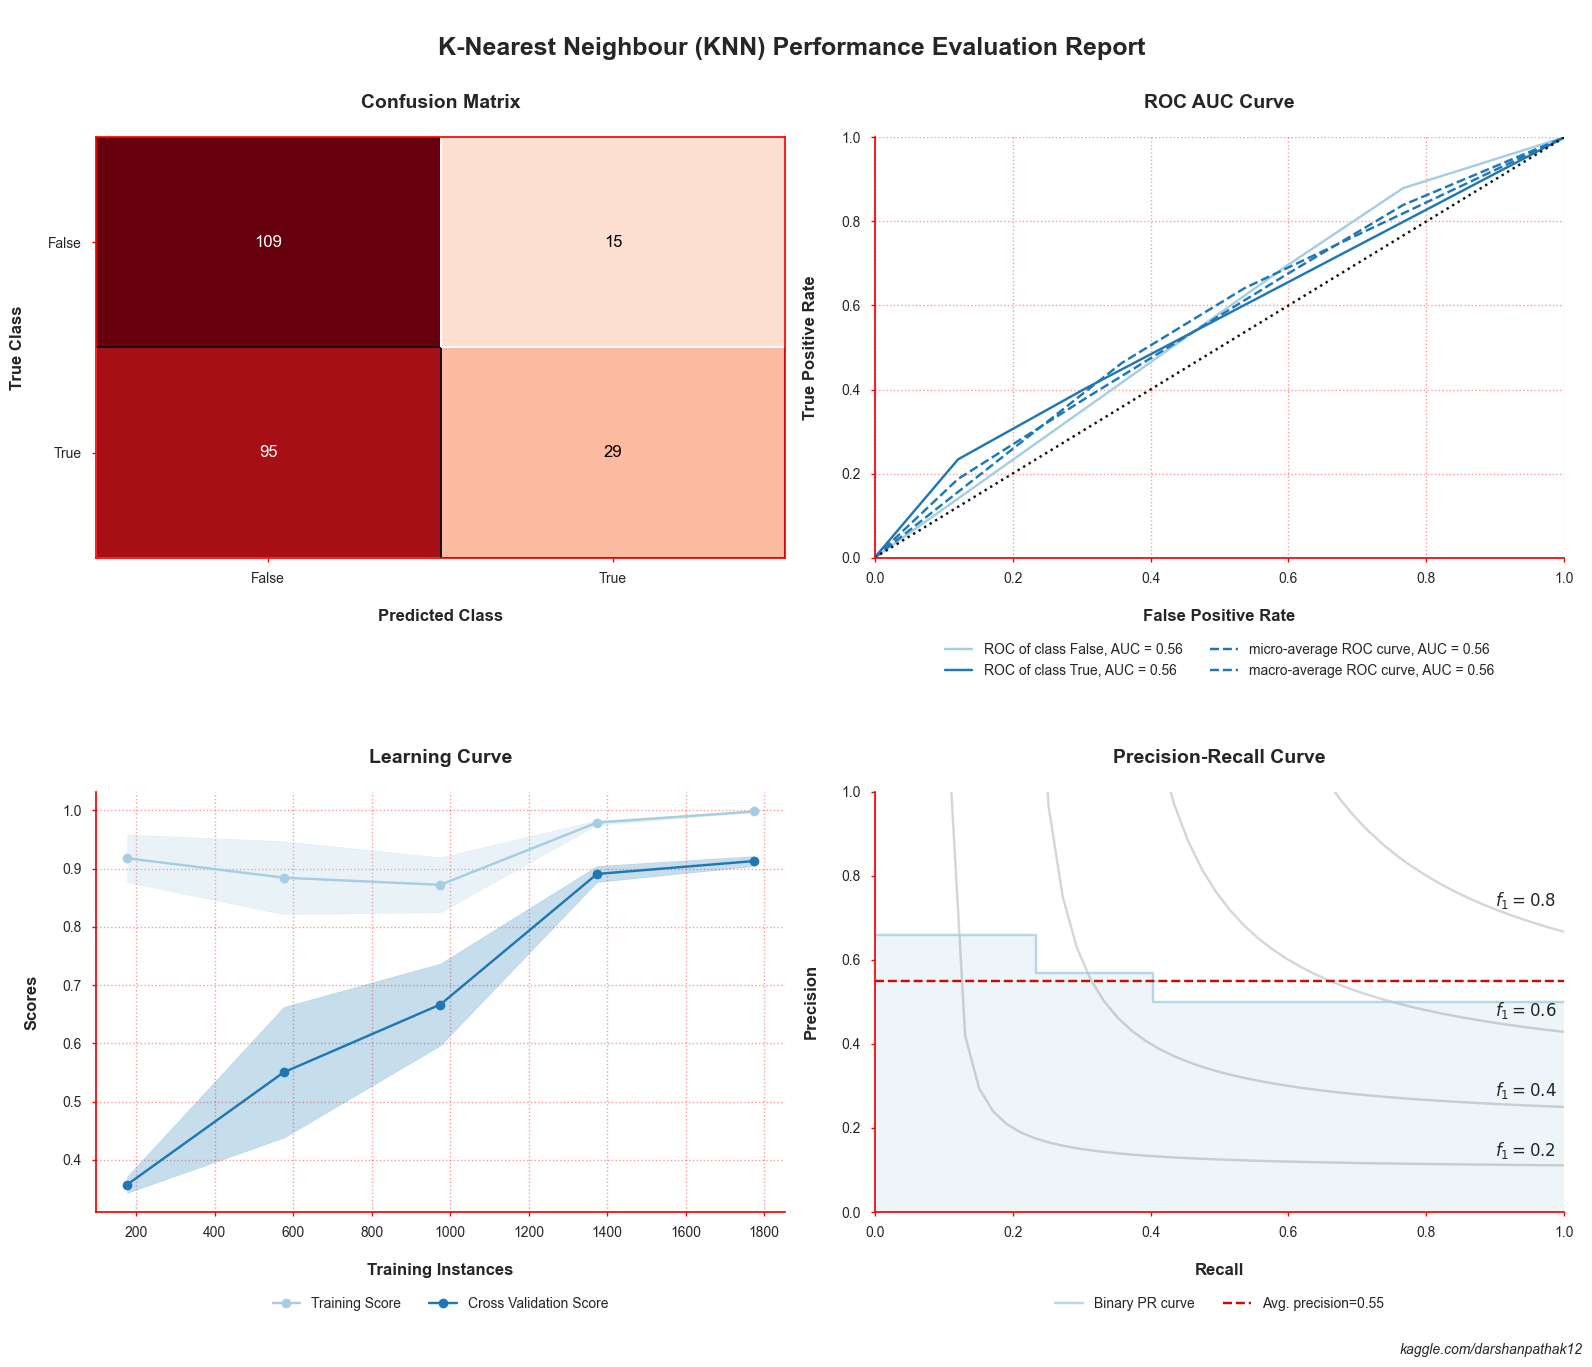

In [19]:
# --- KNN Parameters ---
parameter_knn = {"algo__n_neighbors": [2, 5, 10, 17]
                , "algo__leaf_size": [1, 10, 11, 30]}

# --- KNN Algorithm ---
algo_knn = KNeighborsClassifier(n_jobs=-1)

# --- Applying KNN ---
acc_score_train_knn, acc_score_test_knn, best_score_knn,f1_score_train_knn,f1_score_test_knn,precision_train_knn,precision_test_knn,recall_train_knn,recall_test_knn = fit_ml_models(algo_knn, parameter_knn, "K-Nearest Neighbour (KNN)")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.3 | Support Vector Machine (SVM)</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Support Vector Machine (SVM)</b> is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is <b>to create the best line or decision boundary that can segregate n-dimensional space into classes</b> so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.<br><br>
        SVM chooses the <b>extreme points/vectors</b> that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.<br>
        <center>
            <img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" alt="SVM" width="40%"><br>
            <i>🖼 SVM by JavaTPoint</i>
        </center>
    </blockquote>
</div>

.:. Fitting Support Vector Machine (SVM) .:.
Fitting 10 folds for each of 1 candidates, totalling 10 fits

>> Best Parameters: {'algo__C': 0.6, 'algo__degree': 2, 'algo__kernel': 'poly'}
>> Best Score: 0.842

.:. Train and Test Accuracy Score for Support Vector Machine (SVM) .:.
	>> Train Accuracy: 86.97%
	>> Test Accuracy: 68.55%

.:. Classification Report for Support Vector Machine (SVM) .:.
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       124
           1       0.78      0.52      0.62       124

    accuracy                           0.69       248
   macro avg       0.71      0.69      0.68       248
weighted avg       0.71      0.69      0.68       248



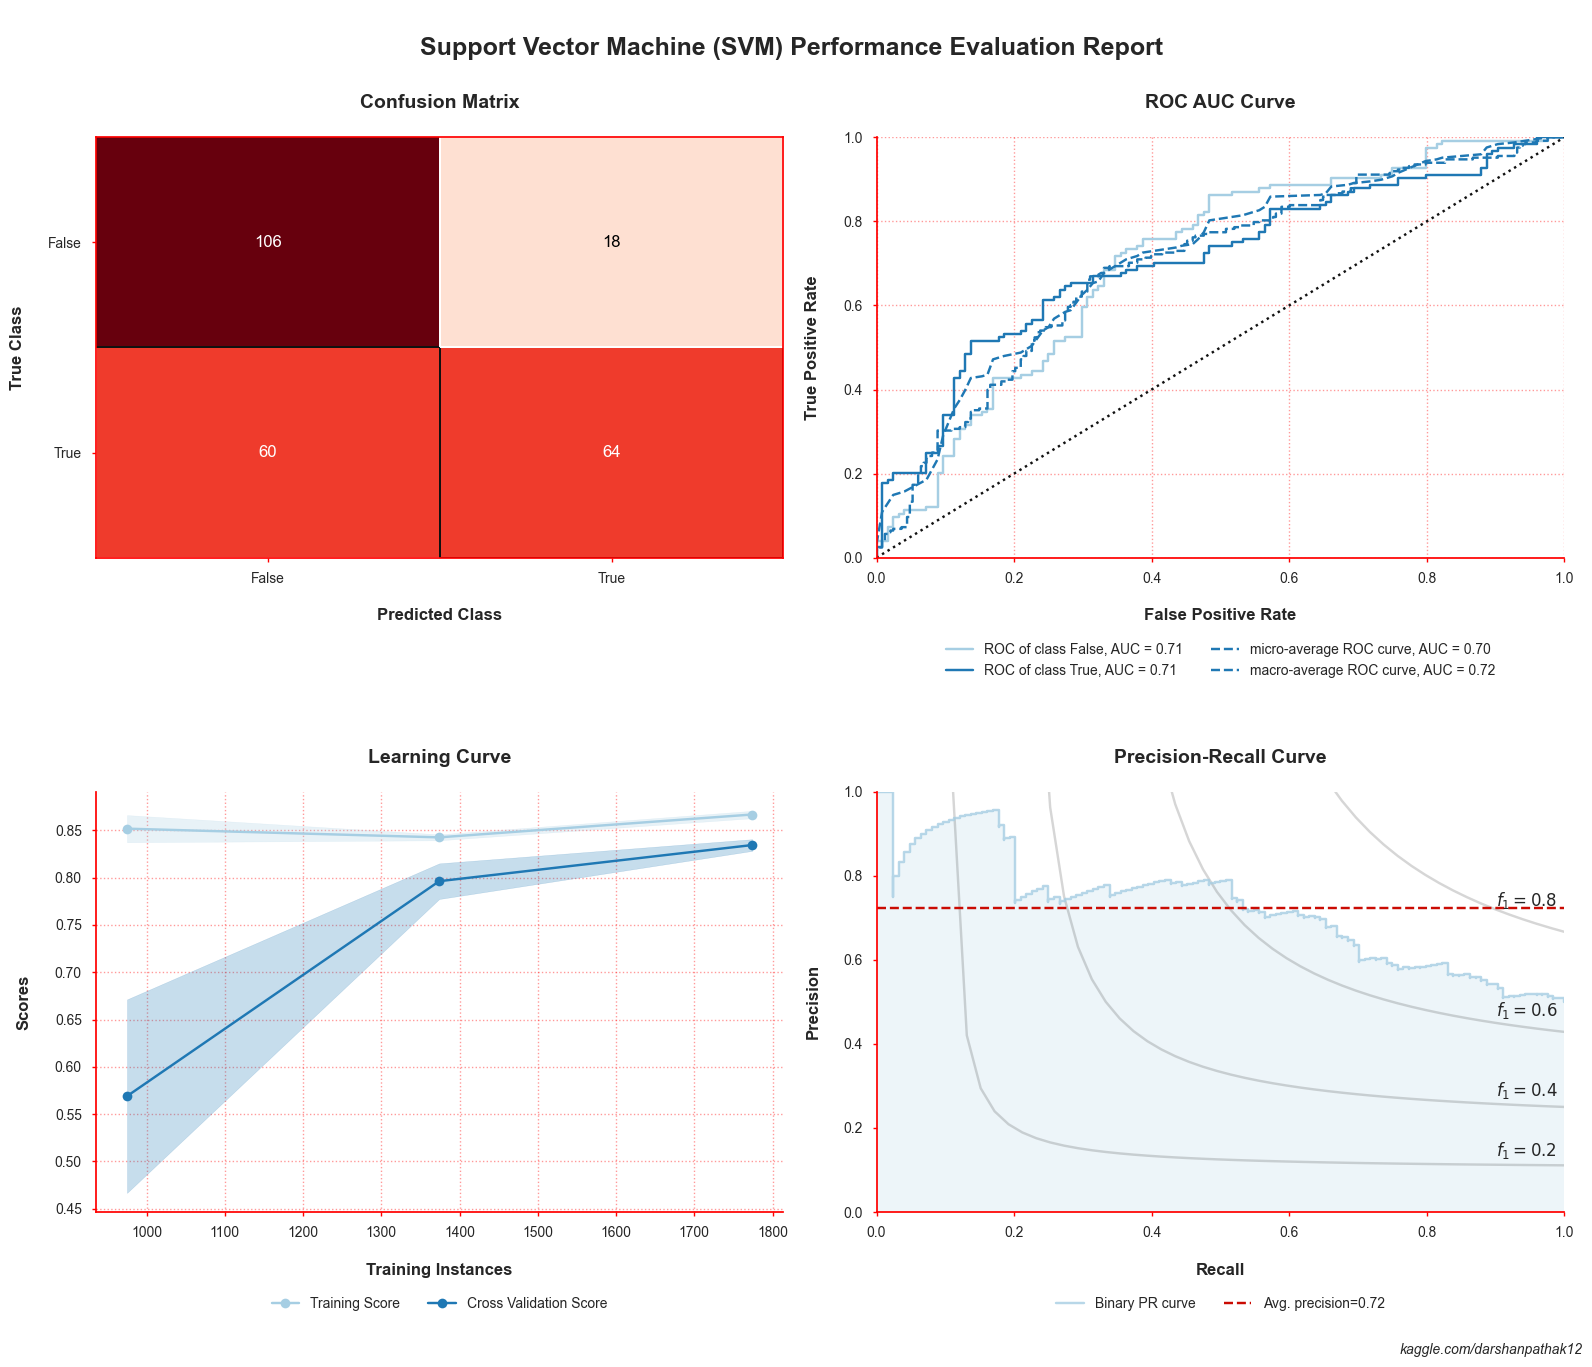

In [20]:
# --- SVM Parameters ---
parameter_svc = [
     {'algo__C': [0.6], 'algo__degree': [2], 'algo__kernel': ['poly']}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- Applying SVM ---
acc_score_train_svc, acc_score_test_svc, best_score_svc,f1_score_train_svc,f1_score_test_svc,precision_train_svc,precision_test_svc,recall_train_svc,recall_test_svc = fit_ml_models(algo_svc, parameter_svc, "Support Vector Machine (SVM)")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.4 | Gaussian Naive Bayes</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Naive Bayes Classifiers</b> are based on the Bayes Theorem, which <b>one assumption taken is the strong independence assumptions between the features</b>. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers <b>need a small training data to estimate the parameters needed for classification</b>. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.<br><br>
        <b>Gaussian Naive Bayes</b> is a <b>variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data</b>. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.<br>
        <center>
            <img src="https://iq.opengenus.org/content/images/2020/02/Illustration-of-how-a-Gaussian-Naive-Bayes-GNB-classifier-works-For-each-data-point.png" alt="GNB" width="35%"><br>
            <i>🖼 Gaussian Naive Bayes by OpenGenus</i>
        </center>
    </blockquote>
</div>

.:. Fitting Gaussian Naive Bayes .:.
Fitting 10 folds for each of 4 candidates, totalling 40 fits

>> Best Parameters: {'algo__var_smoothing': 0.01}
>> Best Score: 0.662

.:. Train and Test Accuracy Score for Gaussian Naive Bayes .:.
	>> Train Accuracy: 66.91%
	>> Test Accuracy: 58.47%

.:. Classification Report for Gaussian Naive Bayes .:.
              precision    recall  f1-score   support

           0       0.61      0.47      0.53       124
           1       0.57      0.70      0.63       124

    accuracy                           0.58       248
   macro avg       0.59      0.58      0.58       248
weighted avg       0.59      0.58      0.58       248



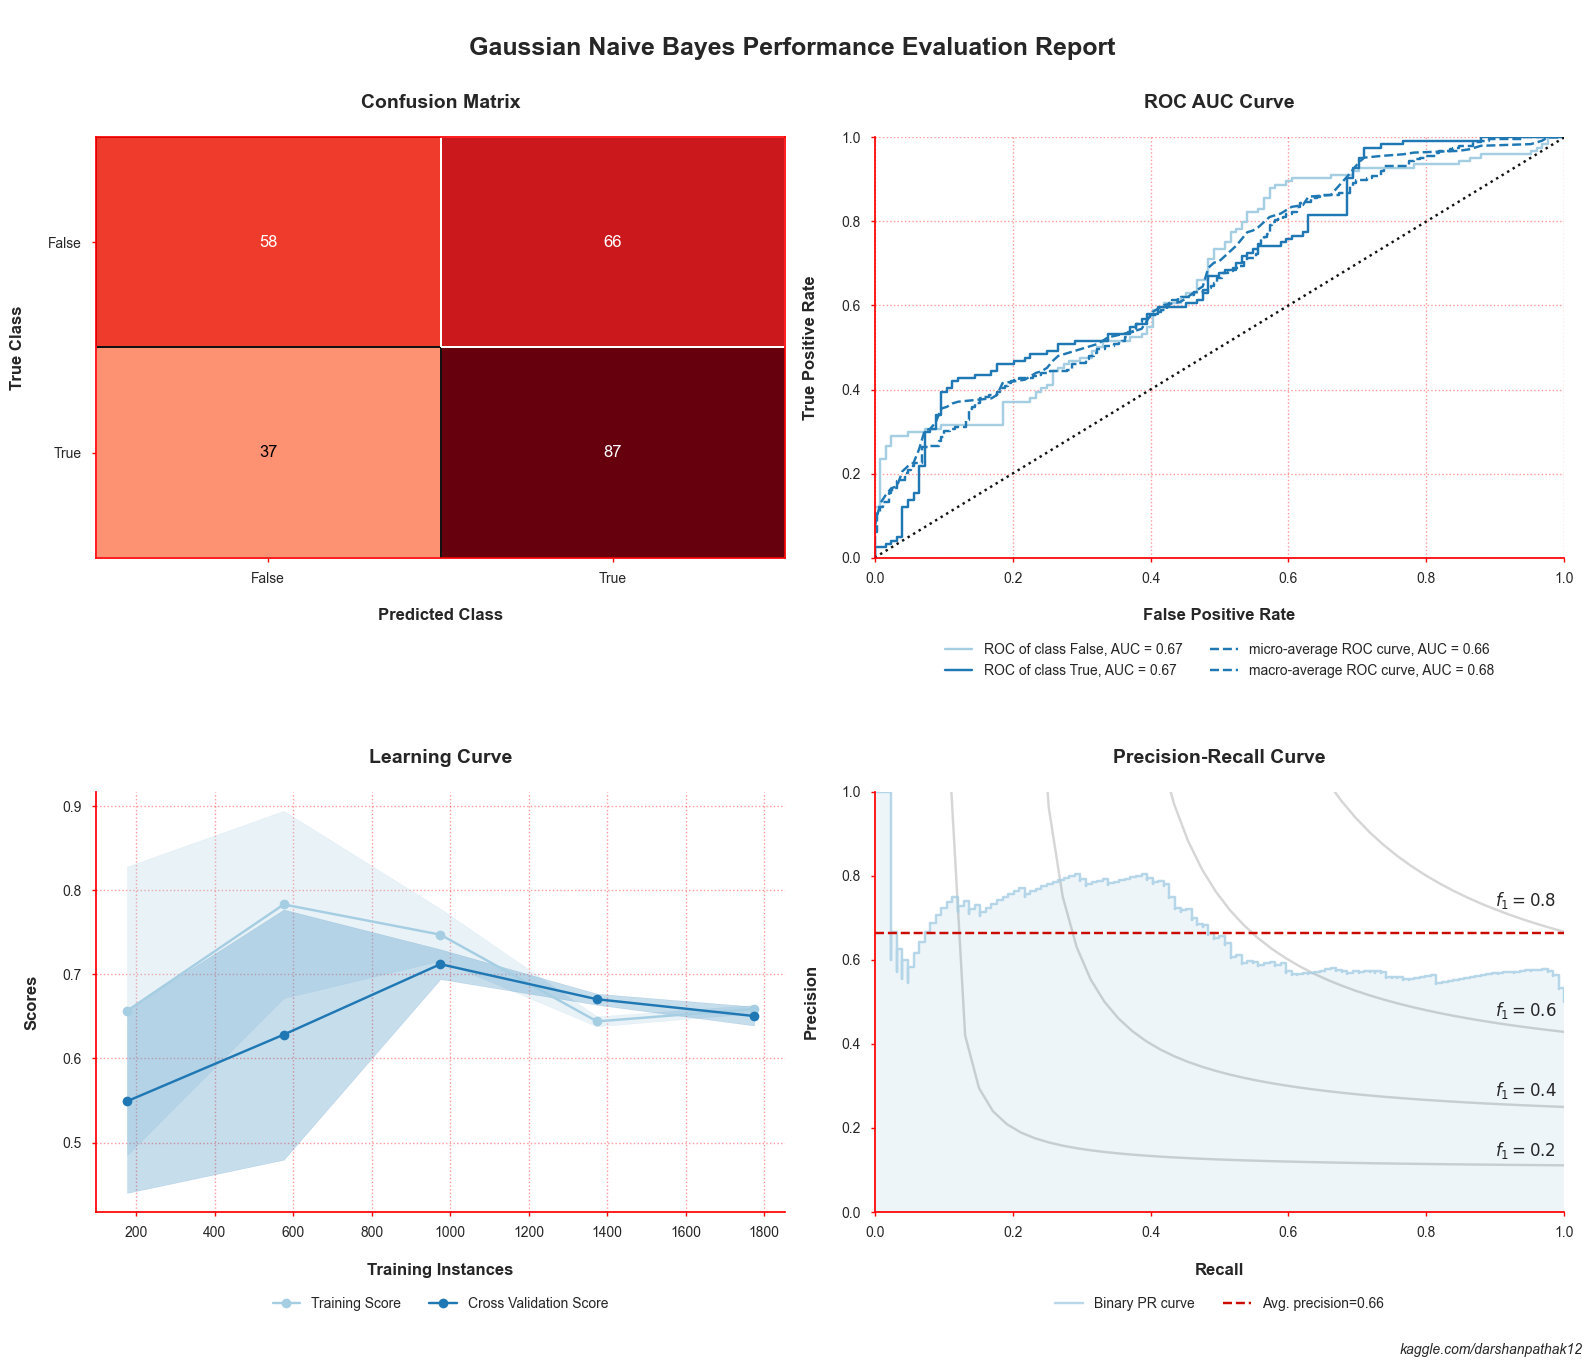

In [21]:
# --- Gaussian NB Parameters ---
parameter_gnb = {"algo__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-6]}

# --- Gaussian NB Algorithm ---
algo_gnb = GaussianNB()

# --- Applying Gaussian NB ---
acc_score_train_gnb, acc_score_test_gnb, best_score_gnb,f1_score_train_gnb,f1_score_test_gnb,precision_train_gnb,precision_test_gnb,recall_train_gnb,recall_test_gnb = fit_ml_models(algo_gnb, parameter_gnb, "Gaussian Naive Bayes")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.5 | Decision Tree</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Decision Tree</b> is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b>internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.<br><br>
        In a Decision tree, there are two nodes, which are the <b>Decision Node and Leaf Node</b>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br>
        <center>
            <img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="DT" width="350" />
        </center>
    </blockquote>
</div>


.:. Fitting Decision Tree .:.
Fitting 10 folds for each of 10 candidates, totalling 100 fits

>> Best Parameters: {'algo__max_depth': 9}
>> Best Score: 0.881

.:. Train and Test Accuracy Score for Decision Tree .:.
	>> Train Accuracy: 96.26%
	>> Test Accuracy: 78.23%

.:. Classification Report for Decision Tree .:.
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       124
           1       0.84      0.70      0.76       124

    accuracy                           0.78       248
   macro avg       0.79      0.78      0.78       248
weighted avg       0.79      0.78      0.78       248



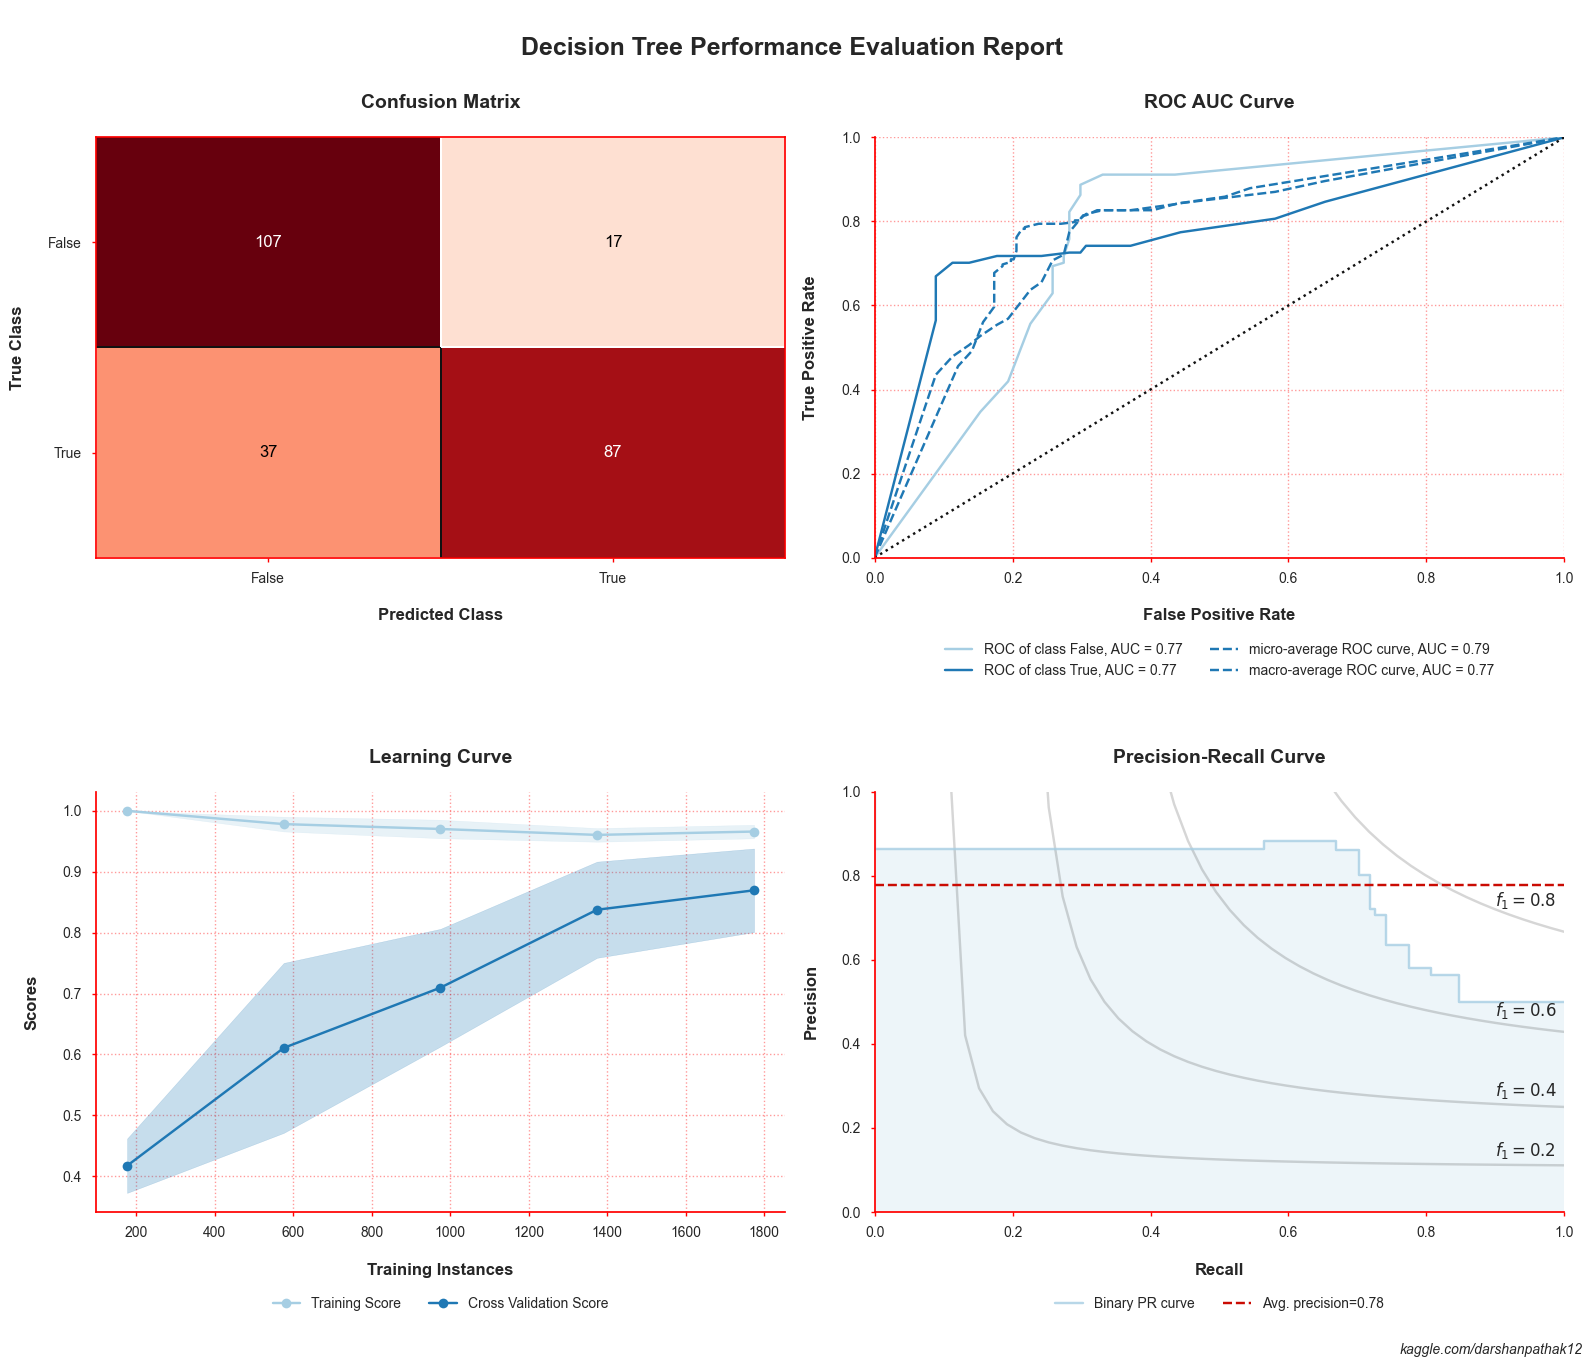

In [22]:
# Decision Tree Parameters
parameter_dt = {
    "algo__max_depth": np.arange(5,15,1),
}

# Decision Tree Algorithm
algo_dt = DecisionTreeClassifier(random_state=42)

# Applying Decision Tree
acc_score_train_dt, acc_score_test_dt, best_score_dt,f1_score_train_dt,f1_score_test_dt,precision_train_dt,precision_test_dt,recall_train_dt,recall_test_dt = fit_ml_models(algo_dt, parameter_dt, "Decision Tree")


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.6 | Random Forest</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Decision Tree</b> is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b>internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome</b>.<br><br>
    In a Decision tree, there are <b>two nodes</b>, which are the <b>Decision Node and Leaf Node</b>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br>
        <center>
            <img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="DT" width="35 />
        </center>
    </blockquote>
</div>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
        <center>
            <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
        </center>
    </blockquote>
</div>

.:. Fitting Random Forest .:.
Fitting 10 folds for each of 2 candidates, totalling 20 fits

>> Best Parameters: {'algo__max_depth': 30}
>> Best Score: 0.939

.:. Train and Test Accuracy Score for Random Forest .:.
	>> Train Accuracy: 100.00%
	>> Test Accuracy: 81.05%

.:. Classification Report for Random Forest .:.
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       124
           1       0.93      0.67      0.78       124

    accuracy                           0.81       248
   macro avg       0.84      0.81      0.81       248
weighted avg       0.84      0.81      0.81       248



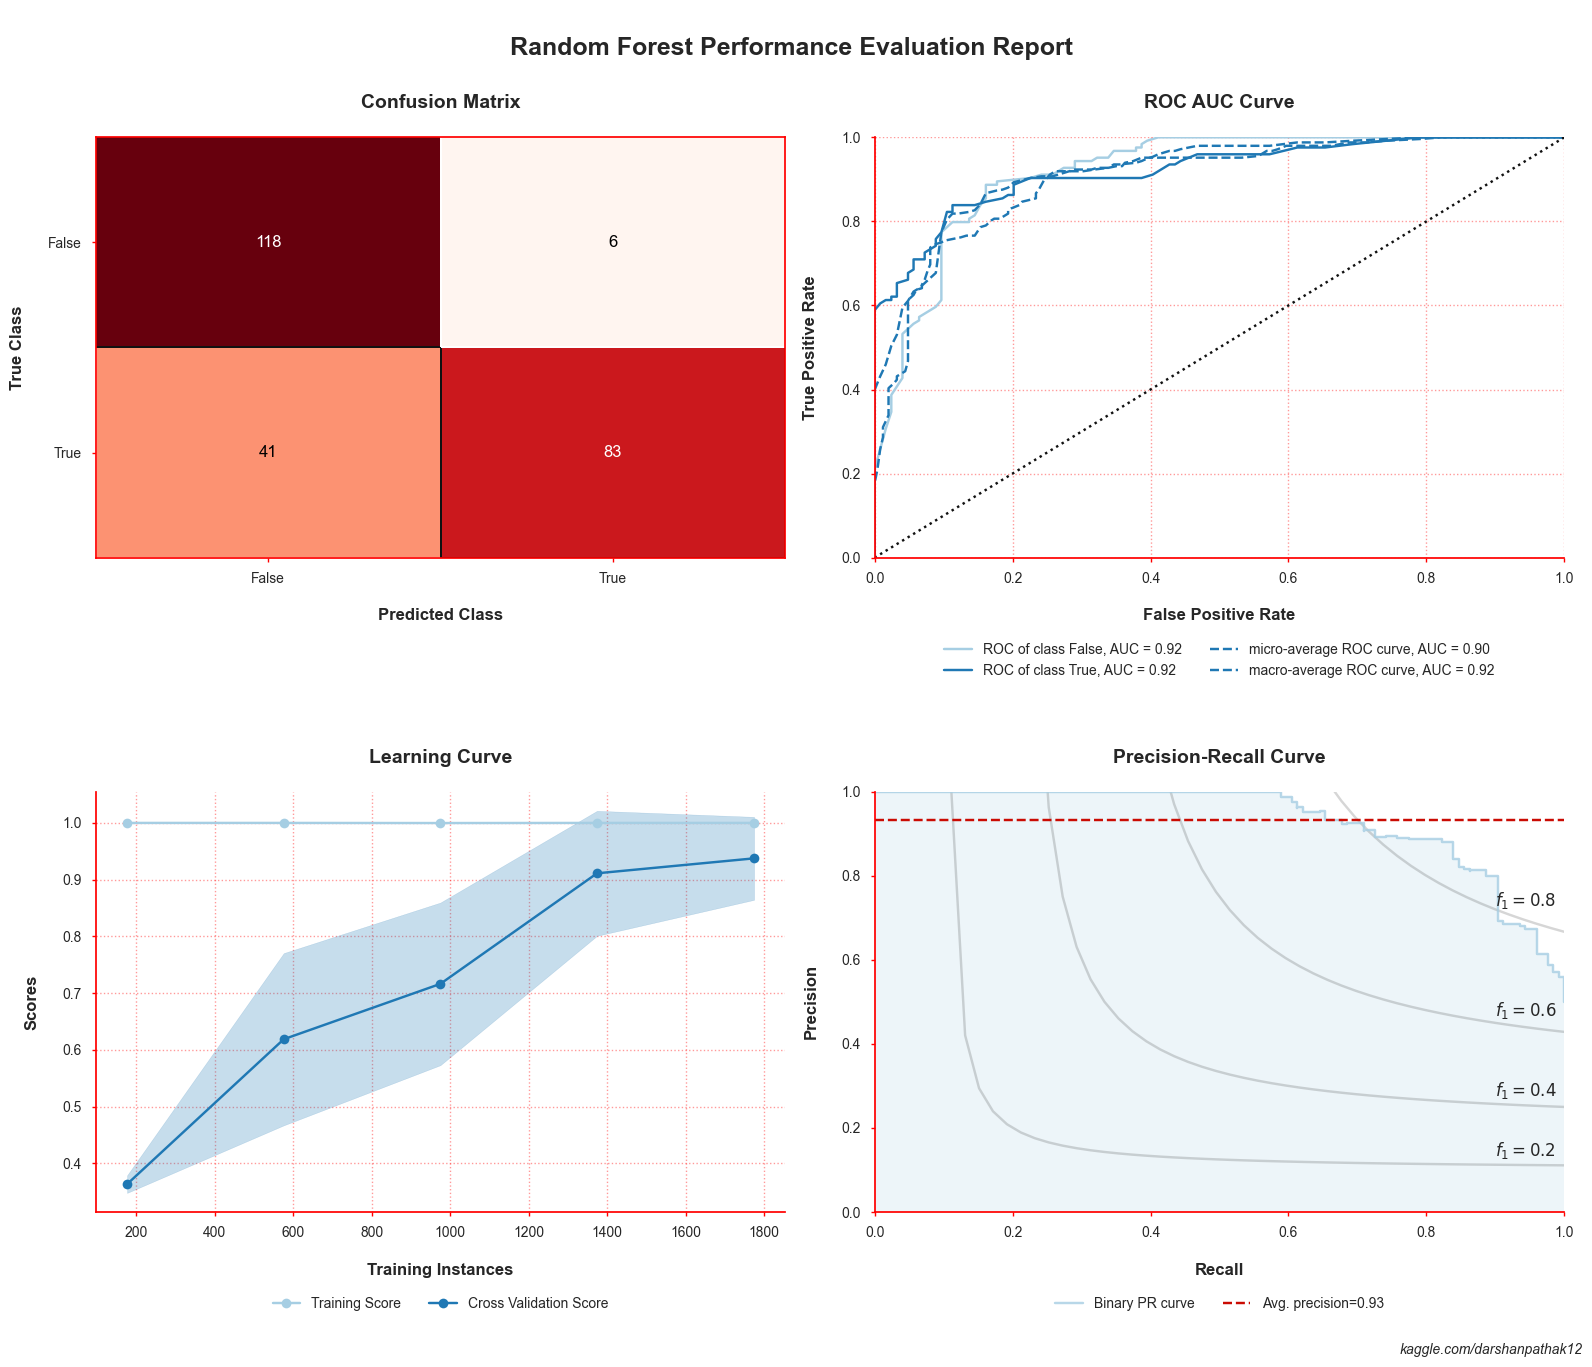

In [23]:
# --- Random Forest Parameters ---
parameter_rf = {"algo__max_depth": np.arange(30,32, 1)}

# --- Random Forest Algorithm ---
algo_rf = RandomForestClassifier(random_state=99, n_jobs=-1)

# --- Applying Random Forest ---
acc_score_train_rf, acc_score_test_rf, best_score_rf,f1_score_train_rf,f1_score_test_rf,precision_train_rf,precision_test_rf,recall_train_rf,recall_test_rf = fit_ml_models(algo_rf, parameter_rf, "Random Forest")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.7 | Extra Tree Classifier</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Extra Trees Classifier</b> is a type of ensemble learning technique which <b>aggregates the results of multiple de-correlated decision trees collected in a "forest" to output it’s classification result</b>. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.<br><br>
        Each Decision Tree in the Extra Trees Forest is <b>constructed from the original training sample</b>. Then, at each test node, each tree is provided with a <b>random sample of k features</b> from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple decisions.
        <center>
            <img src="https://www.researchgate.net/profile/Wangda-Zuo-2/publication/364771403/figure/fig1/AS:11431281097117604@1668450027415/Structure-of-Extra-Trees-Kapoor-2020-Extra-Trees-constructs-the-set-of-decision-trees.png" alt="ETC" width="35%"><br>
        </cenees.
    </blockquote>
</div>

.:. Fitting Extra Tree Classifier .:.
Fitting 10 folds for each of 6 candidates, totalling 60 fits

>> Best Parameters: {'algo__max_depth': 3, 'algo__max_leaf_nodes': 7}
>> Best Score: 0.770

.:. Train and Test Accuracy Score for Extra Tree Classifier .:.
	>> Train Accuracy: 78.09%
	>> Test Accuracy: 64.11%

.:. Classification Report for Extra Tree Classifier .:.
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       124
           1       0.67      0.56      0.61       124

    accuracy                           0.64       248
   macro avg       0.65      0.64      0.64       248
weighted avg       0.65      0.64      0.64       248



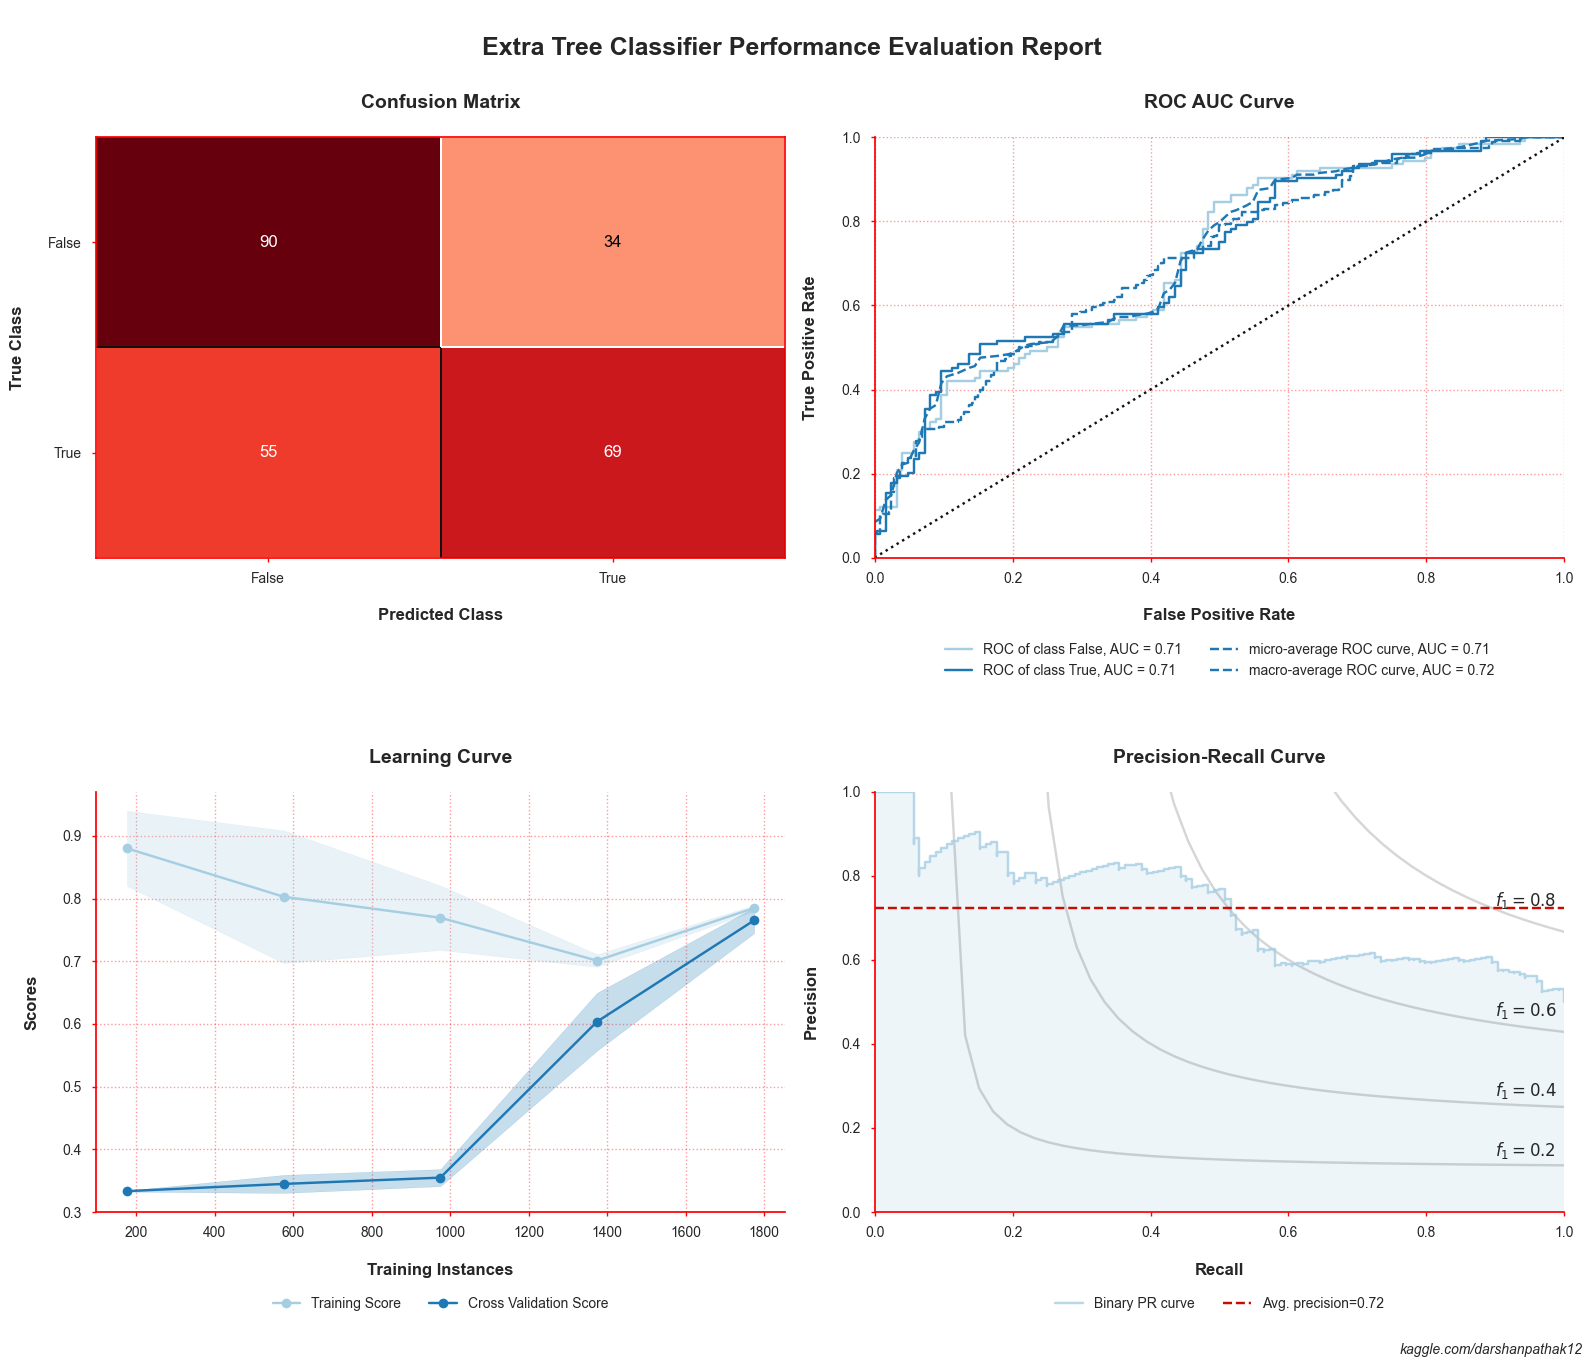

In [24]:
# --- Extra Tree Parameters ---
parameter_et = {"algo__max_depth": [2, 3]
    , "algo__max_leaf_nodes": [3, 5, 7]}

# --- Extra Tree Algorithm ---
algo_et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# --- Applying Extra Tree ---
acc_score_train_et, acc_score_test_et, best_score_et,f1_score_train_et,f1_score_test_et,precision_train_et,precision_test_et,recall_train_et,recall_test_et = fit_ml_models(algo_et, parameter_et, "Extra Tree Classifier")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.8 | Gradient Boosting</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>Boosting</b> is a method of <b>converting weak learners into strong learners</b>. In boosting, <b>each new tree is a fit on a modified version</b> of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is <b>to establish target outcomes for this upcoming model to minimize errors</b>.<br><br>
        <b>Gradient Boosting</b> trains many models in <b>a gradual, additive and sequential manner</b>. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.<br>
        <center>
            <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG" alt="GB" width="35%"><br>
        </center>
    </blockquote>
</div>

.:. Fitting Gradient Boosting .:.
Fitting 10 folds for each of 27 candidates, totalling 270 fits

>> Best Parameters: {'algo__learning_rate': 0.5, 'algo__min_weight_fraction_leaf': 0.1, 'algo__n_estimators': 6}
>> Best Score: 0.855

.:. Train and Test Accuracy Score for Gradient Boosting .:.
	>> Train Accuracy: 87.65%
	>> Test Accuracy: 83.47%

.:. Classification Report for Gradient Boosting .:.
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       124
           1       0.90      0.76      0.82       124

    accuracy                           0.83       248
   macro avg       0.84      0.83      0.83       248
weighted avg       0.84      0.83      0.83       248



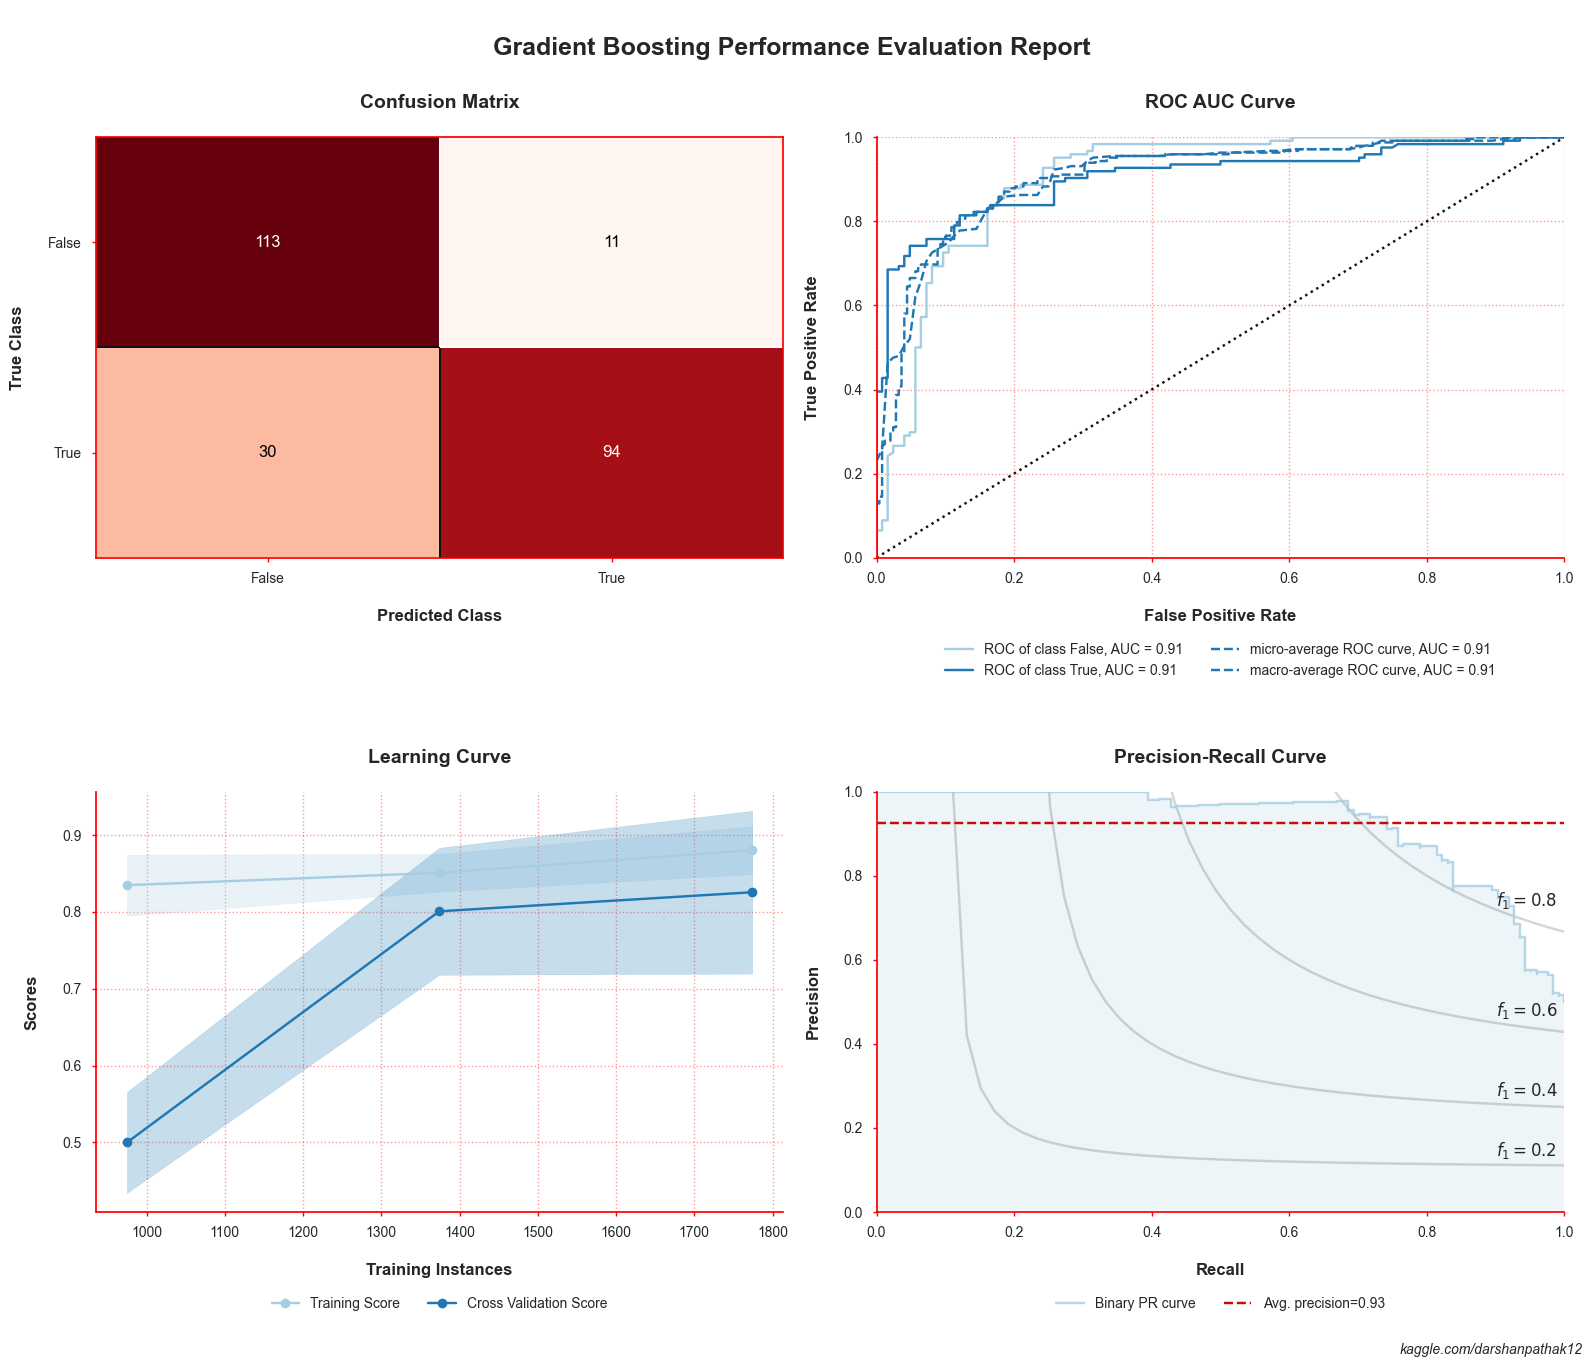

In [25]:
# --- Gradient Boosting Parameters ---
parameter_gb = {
    "algo__learning_rate": [0.1, 0.3, 0.5]
    , "algo__n_estimators": [2, 4, 6]
    , "algo__min_weight_fraction_leaf": [0.1, 0.2, 0.5]
}

# --- Gradient Boosting Algorithm ---
algo_gb = GradientBoostingClassifier(loss="exponential", random_state=2)

# --- Applying Gradient Boosting ---
acc_score_train_gb, acc_score_test_gb, best_score_gb,f1_score_train_gb,f1_score_test_gb,precision_train_gb,precision_test_gb,recall_train_gb,recall_test_gb = fit_ml_models(algo_gb, parameter_gb, "Gradient Boosting")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.9 | AdaBoost</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>AdaBoost</b> also called <b>Adaptive Boosting</b> is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is <b>decision trees with one level</b> that means with Decision trees with only 1 split. These trees are also called <b>Decision Stumps</b>. <b>AdaBoost builds a model and gives equal weights to all the data points</b>. It then assigns higher weights to points that are wrongly classified. Now, all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.
         <center>
            <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*KYszvMnr3nCtjaGy.png" alt="ADABoost" width="35%"><br>
        </center>
    </blockquote>
</div>

.:. Fitting AdaBoost .:.
Fitting 10 folds for each of 9 candidates, totalling 90 fits

>> Best Parameters: {'algo__learning_rate': 0.75, 'algo__n_estimators': 200}
>> Best Score: 0.906

.:. Train and Test Accuracy Score for AdaBoost .:.
	>> Train Accuracy: 93.91%
	>> Test Accuracy: 89.92%

.:. Classification Report for AdaBoost .:.
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       124
           1       0.92      0.88      0.90       124

    accuracy                           0.90       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.90      0.90      0.90       248



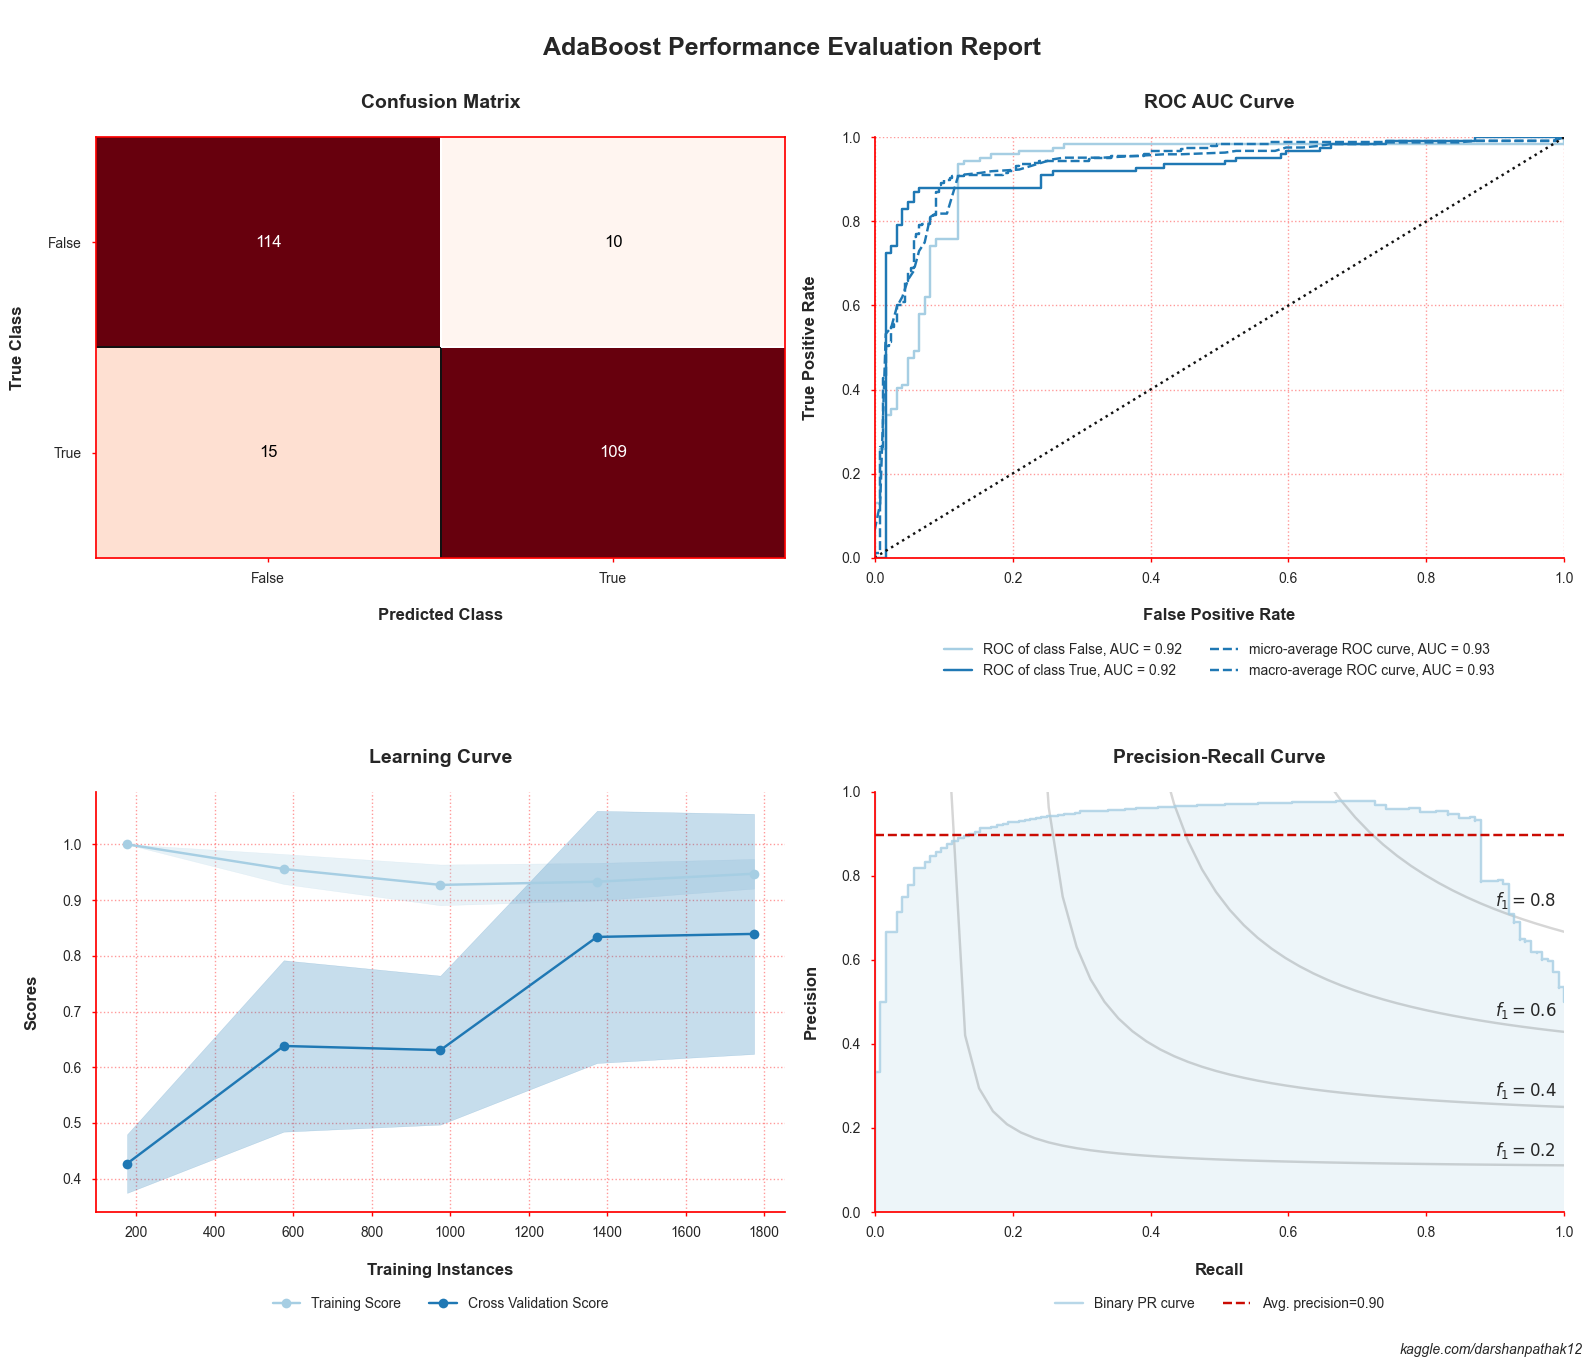

In [26]:
# --- AdaBoost Parameters ---
parameter_ab = {
    "algo__n_estimators": [100,200,300]
    , "algo__learning_rate": [0.1,0.75,0.1]
}

# --- AdaBoost Algorithm ---
algo_ab = AdaBoostClassifier(random_state=1)

# --- Applying AdaBoost ---
acc_score_train_ab, acc_score_test_ab, best_score_ab,f1_score_train_ab,f1_score_test_ab,precision_train_ab,precision_test_ab,recall_train_ab,recall_test_ab = fit_ml_models(algo_ab, parameter_ab, "AdaBoost")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.10 | XgBoost</h2>
<div class="explain-box">
    <blockquote style="color: #000000;">
        <b>XGBoost</b> stands for <b>Extreme Gradient Boosting</b> and is a powerful and efficient implementation of the gradient boosting framework. It is widely used for supervised learning tasks, particularly in structured/tabular data problems, and excels in both speed and performance. XGBoost builds a series of decision trees sequentially, with each tree aiming to correct the errors of its predecessor. Unlike traditional gradient boosting methods, XGBoost employs a more regularized model structure, which helps prevent overfitting and enhances generalization. It also incorporates advanced features like parallel computing, tree pruning, and handling missing values, making it a popular choice in machine learning competitions and real-world applications.
         <center>
            <img src="XGBoost.png" alt="XGBoost" width="35%"/><br>
        </center>
    </blockquote>
</div>

.:. Fitting XGBoost .:.
Fitting 10 folds for each of 1 candidates, totalling 10 fits

>> Best Parameters: {'algo__learning_rate': 0.75, 'algo__n_estimators': 100}
>> Best Score: 0.915

.:. Train and Test Accuracy Score for XGBoost .:.
	>> Train Accuracy: 100.00%
	>> Test Accuracy: 87.90%

.:. Classification Report for XGBoost .:.
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       124
           1       0.95      0.80      0.87       124

    accuracy                           0.88       248
   macro avg       0.89      0.88      0.88       248
weighted avg       0.89      0.88      0.88       248



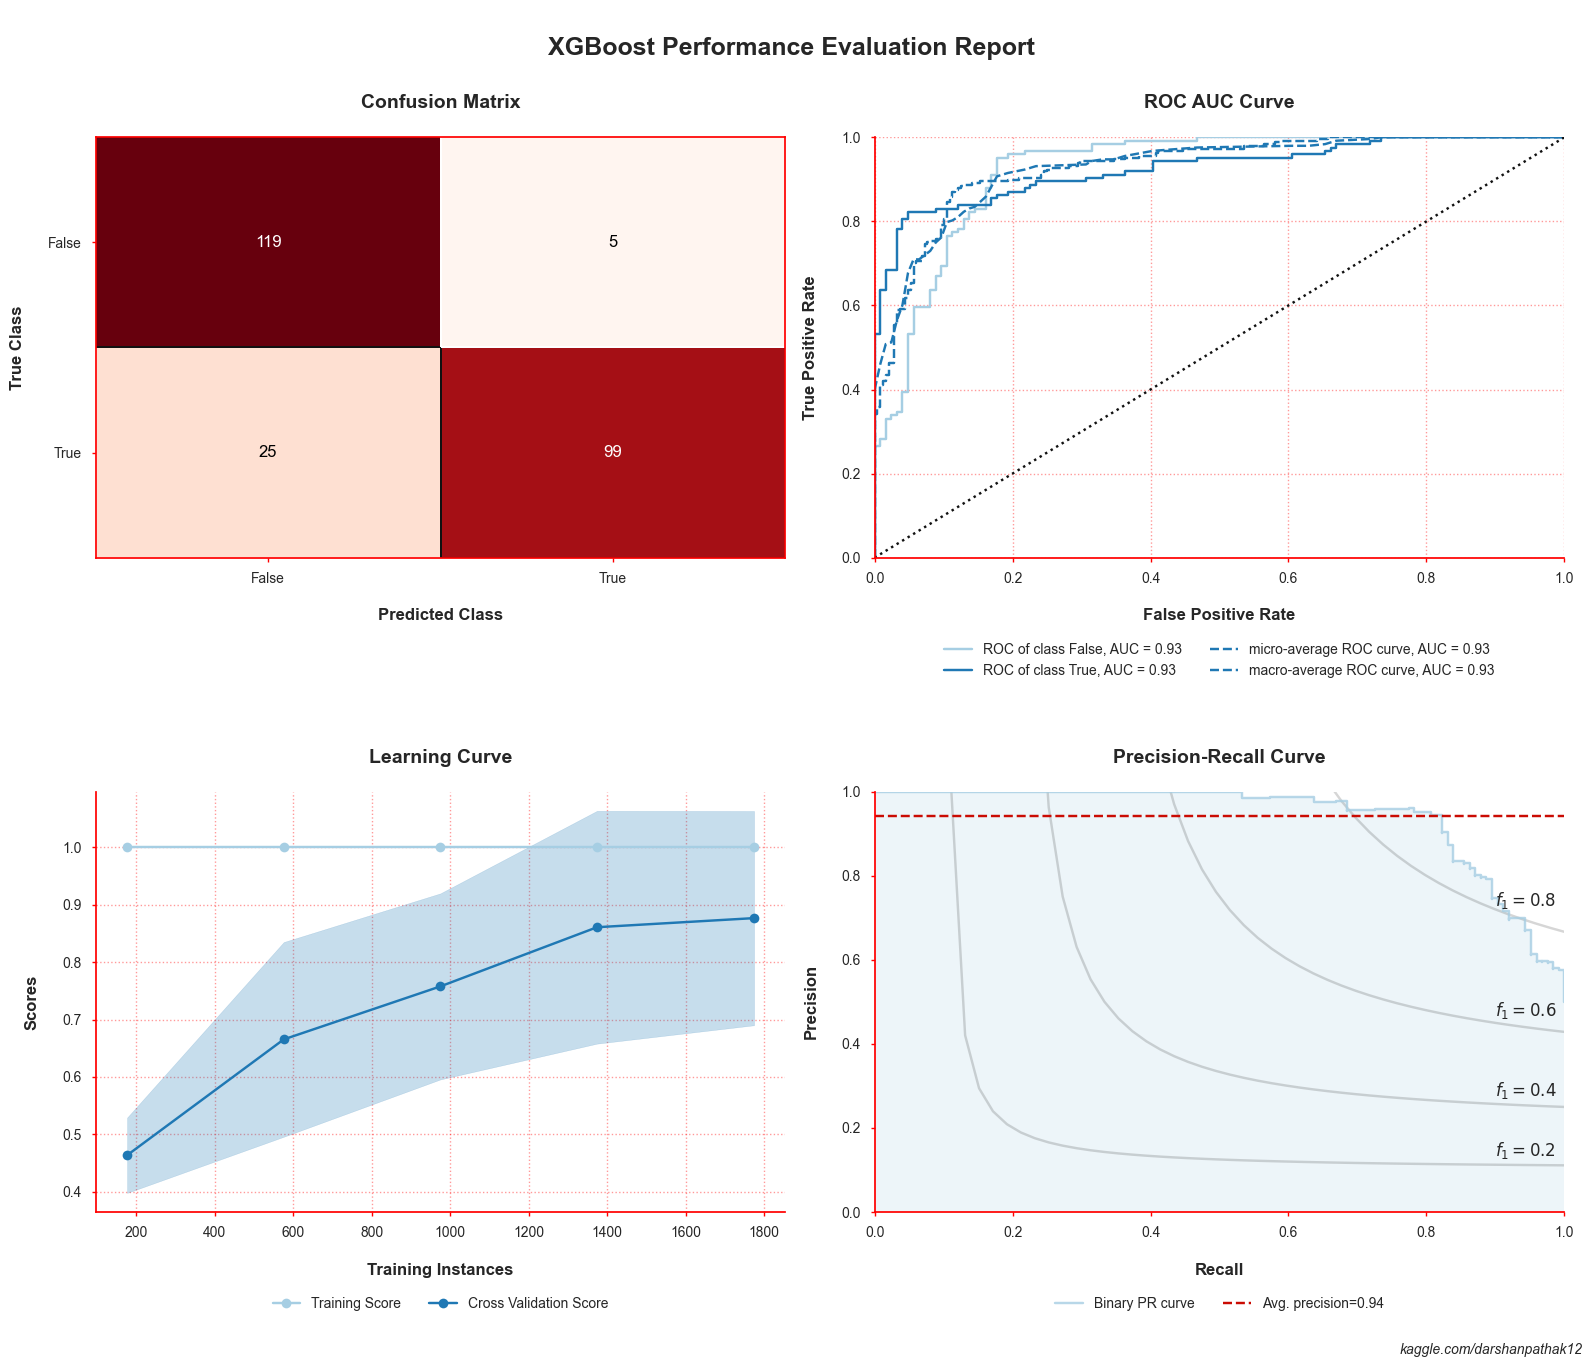

In [27]:
# --- XGBoost Parameters ---
import xgboost as xgb
parameter_xgb = {
    "algo__n_estimators": [100],
    "algo__learning_rate": [0.75]
}

# --- XGBoost Algorithm ---
algo_xgb = xgb.XGBClassifier(random_state=1)

# --- Applying XGBoost ---
acc_score_train_xgb, acc_score_test_xgb, best_score_xgb,f1_score_train_xgb,f1_score_test_xgb,precision_train_xgb,precision_test_xgb,recall_train_xgb,recall_test_xgb = fit_ml_models(algo_xgb, parameter_xgb, "XGBoost")

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7.11 | Model Comparison 👀</h2>
<div class="explain-box">
    After implementing and tuning 9 models, this section will <b>compare all machine learning models accuracy and best score</b>.
</div>

In [28]:
# --- Create Accuracy Comparison Table ---
df_compare = pd.DataFrame({
                             'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Gaussian NB',
                                     'Decision Tree', 'Random Forest', 'Extra Tree Classifier', 'Gradient Boosting', 'AdaBoost','XGBoost'] 
                           , 'Accuracy Train': [acc_score_train_lr, acc_score_train_knn, acc_score_train_svc, acc_score_train_gnb,
                                                acc_score_train_dt, acc_score_train_rf, acc_score_train_et, acc_score_train_gb, acc_score_train_ab,acc_score_train_xgb]
                           , 'Accuracy Test': [acc_score_test_lr, acc_score_test_knn, acc_score_test_svc, acc_score_test_gnb,
                                               acc_score_test_dt, acc_score_test_rf, acc_score_test_et, acc_score_test_gb, acc_score_test_ab,acc_score_test_xgb]
                           , 'Best Score': [best_score_lr, best_score_knn, best_score_svc, best_score_gnb,best_score_dt, best_score_rf, 
                                            best_score_et, best_score_gb, best_score_ab,best_score_xgb]
                           , 'F1 Score Train': [f1_score_train_lr, f1_score_train_knn, f1_score_train_svc, f1_score_train_gnb,
                                                f1_score_train_dt, f1_score_train_rf, f1_score_train_et, f1_score_train_gb, f1_score_train_ab,f1_score_train_xgb]
                           , 'F1 Score Test': [f1_score_test_lr, f1_score_test_knn, f1_score_test_svc, f1_score_test_gnb,
                                                f1_score_test_dt, f1_score_test_rf, f1_score_test_et, f1_score_test_gb, f1_score_test_ab,f1_score_test_xgb]
                           , 'Precision Score Train': [precision_train_xgb, precision_train_knn, precision_train_svc, precision_train_gnb,
                                                precision_train_dt, precision_train_rf, precision_train_et, precision_train_gb, precision_train_ab,precision_train_xgb]
                           , 'Precision Score Test': [precision_test_lr, precision_test_knn, precision_test_svc, precision_test_gnb,
                                                precision_test_dt, precision_test_rf, precision_test_et, precision_test_gb, precision_test_ab,precision_test_xgb]
                           , 'Recall Score Train': [recall_train_lr, recall_train_knn, recall_train_svc, recall_train_gnb,
                                                recall_train_dt, recall_train_rf, recall_train_et, recall_train_gb, recall_train_ab,recall_train_xgb]
                           , 'Recall Score Test': [recall_test_lr, recall_test_knn, recall_test_svc, recall_test_gnb,
                                                recall_test_dt, recall_test_rf, recall_test_et, recall_test_gb, recall_test_ab,recall_test_xgb]
                           })

# --- Create Comparison Table ---
print(clr.start+f".:. Models Comparison .:."+clr.end)
print(clr.color+'*' * 26)
df_compare.sort_values(by=['Accuracy Test','F1 Score Test','Best Score'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues').set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])

.:. Models Comparison .:.
**************************


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">8. | Miscellaneous 🧪</h1>
<div class="explain-box">
    This section focuses onbrk>creating a complete pipelinebrk>, starting from data processing to a machine learning pipeline, using the best model concluded in the previous section andbrk>exporting it to <code>joblib</code> and <code>pickle (.pkl)</code> filesbrk>. Besides that,brk>test dataset predicted results would also be exportedbrk> along with actual results in CSV and JSON files. Moreover, this section will alsobrk>make predictions on dummy databrk> (data generated using Python functions) andbrk>export them to CSV and JSON filesbrk>.
</d -->

In [29]:
# --- Complete Pipeline: Preprocessor & RF ---
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor)
    , ('algo', xgb.XGBClassifier(random_state=1))
])

# --- Save Complete Pipeline (joblib and pickle) ---
file_name = 'pipeline_employee_churn_xgboost_pathakdarshan'
for ext in ['joblib', 'pkl']:
    joblib.dump(xgb_pipeline, f'Pipeline/{file_name}.{ext}')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">9. | Conclusions and Future Improvements 🧐</h1>
<div class="explain-box">
    From the results of dataset analysis and implementation of machine learning models in the previous section, <b>it can be concluded as follows</b>:
    <blockquote style="color: #000000;">
        <ul>
            <li><b>XGBoost is the best model</b> out of 10 machine-learning models implemented in this notebook. This is because <b>this model fits well with train and test data</b>. In addition, <b>this model also performs better than other models when predicting the test data</b> (can be seen from the performance evaluation graph and classification report of each model).</li>
            <li><b>The prediction results on test data and the complete machine learning pipeline have been successfully exported</b> for other purposes. In addition, data exploration has also been successfully carried out using the <code>ydata-profiling</code>, <code>seaborn</code>, and <code>matplotlib</code> libraries.</li>
            <li><b>Several improvements can be implemented in the following research/notebook</b>. For example is performing advanced hyperparameter tuning experiments to obtain higher accuracy.</li>
        </ul>
    </blockquote>
</div>

## <center><h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Thank You</h1></center>